#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [ ]:
!nvidia-smi

Tue Oct  1 05:56:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 38.1 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sCoQ1oYiNNK5RxMwVs72")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov11:: 100%|██████████| 6472/6472 [00:01<00:00, 5413.86it/s]


In [ ]:
dataset.location

'/content/PPE_Detection-2'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

1.   List item
2.   List item



In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PPE_Detection-2/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

**Step # 05 Examine Training Results**

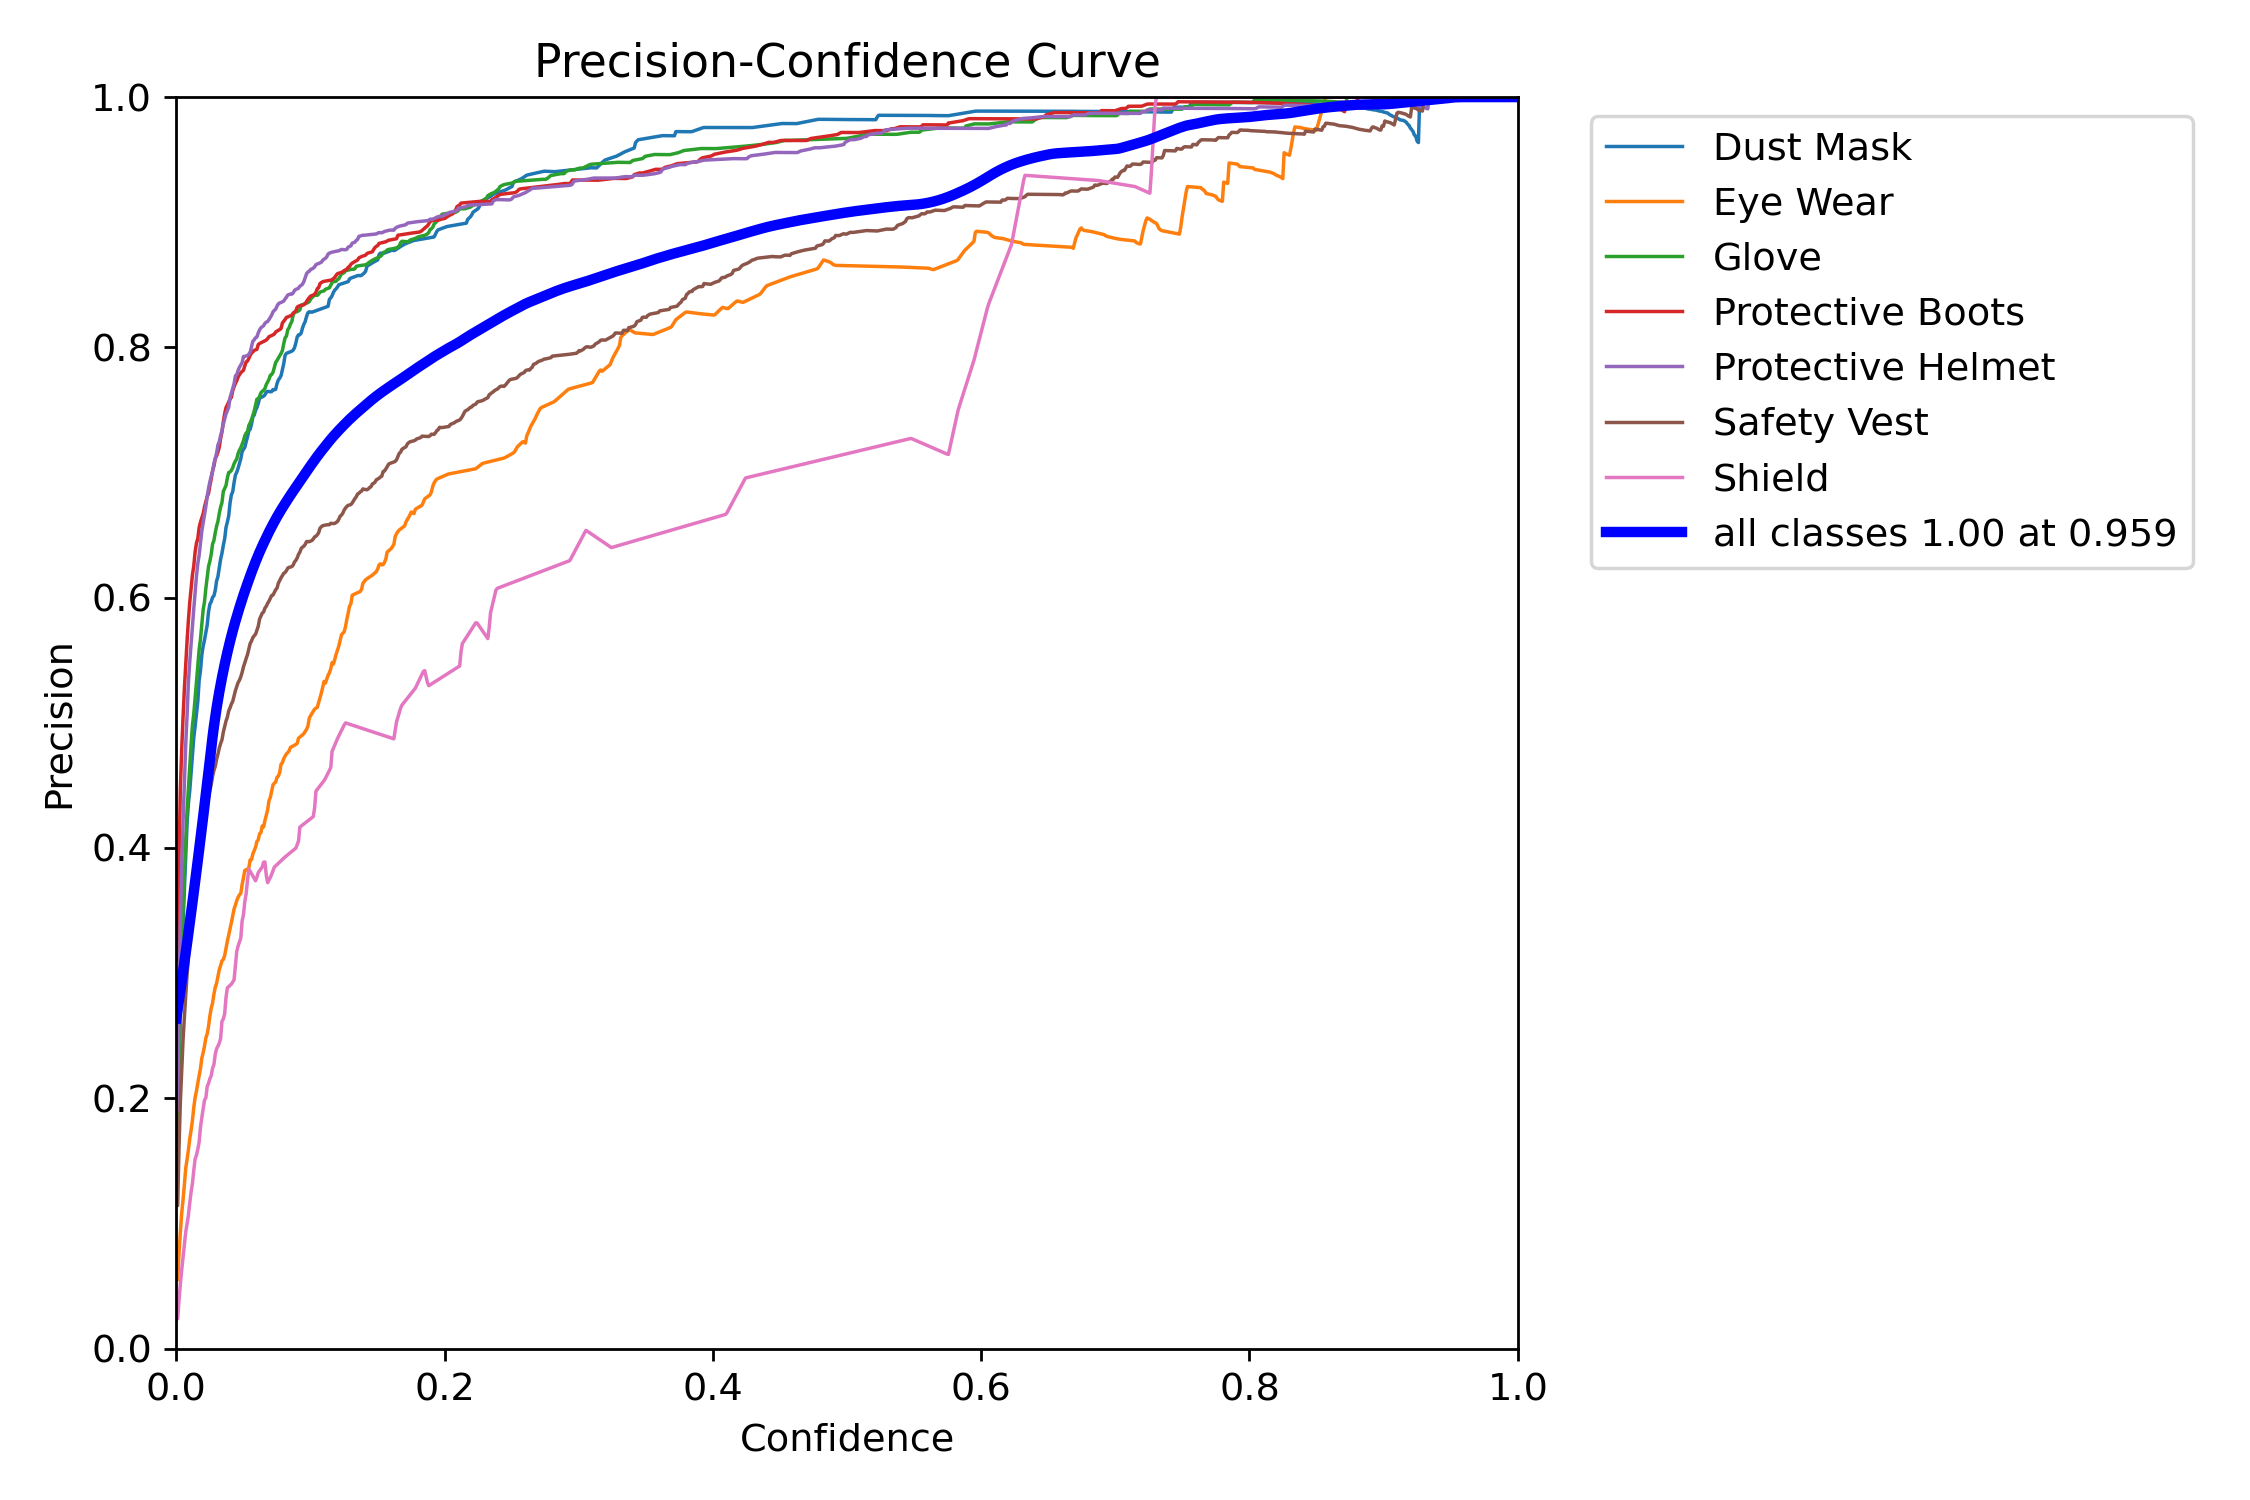

In [ ]:
Image("/content/runs/detect/train3/P_curve.png", width=600)

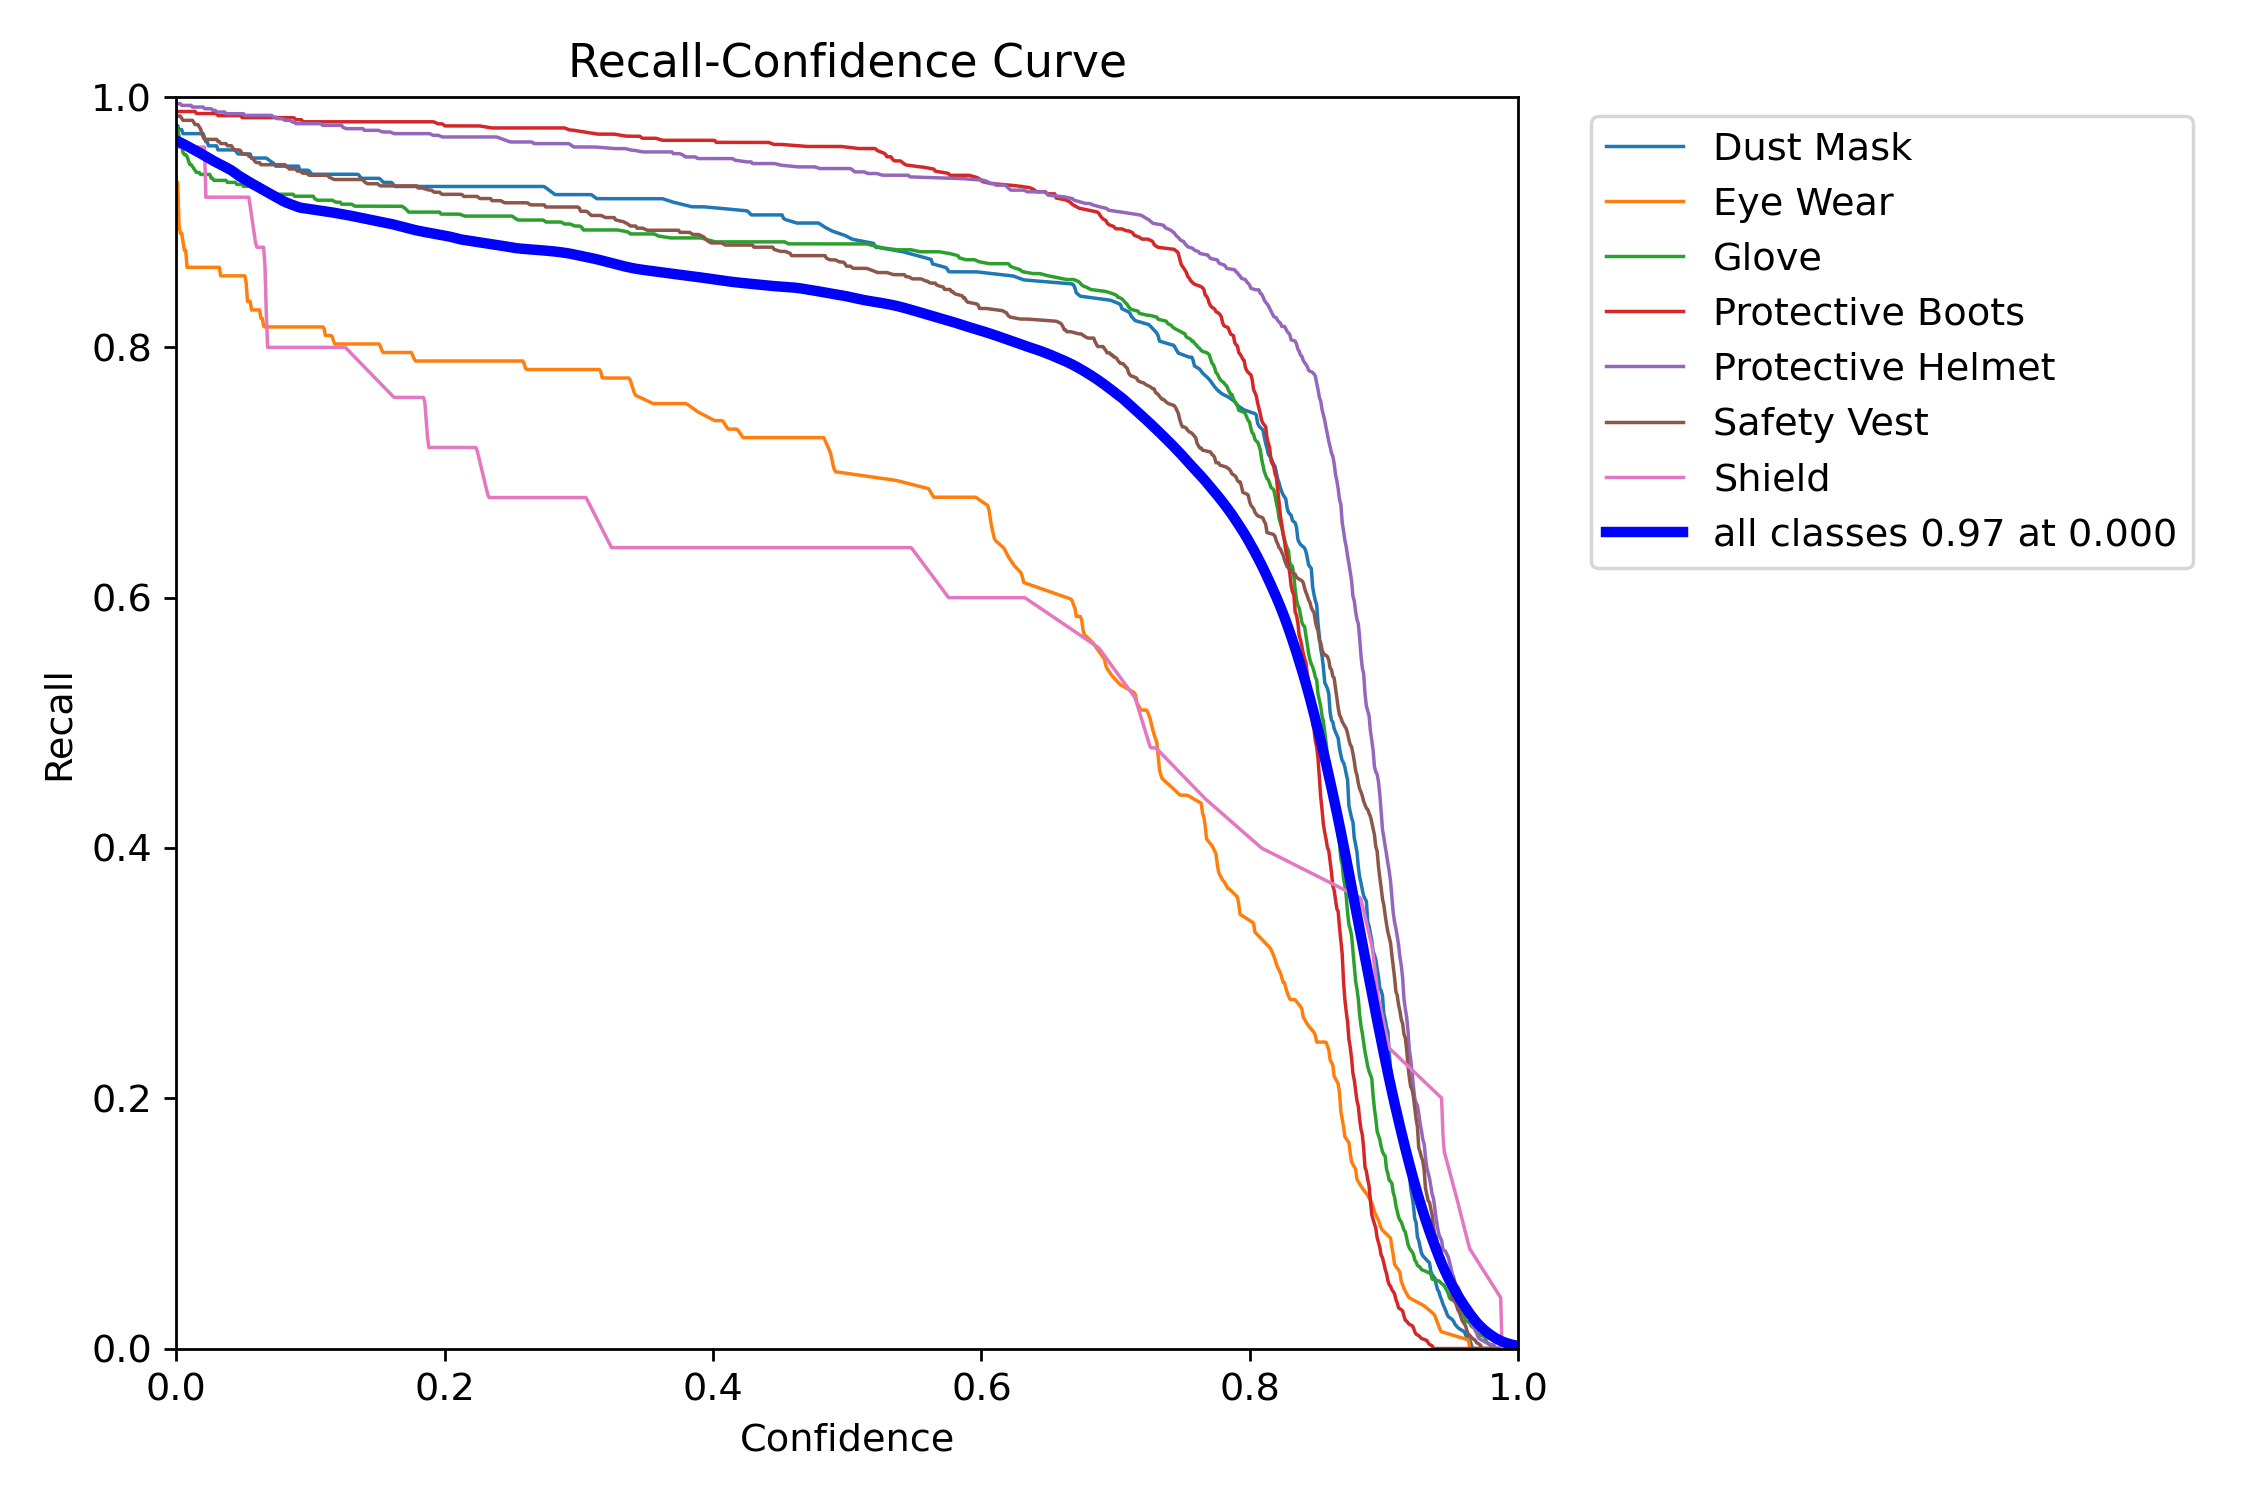

In [ ]:
Image("/content/runs/detect/train3/R_curve.png", width=600)

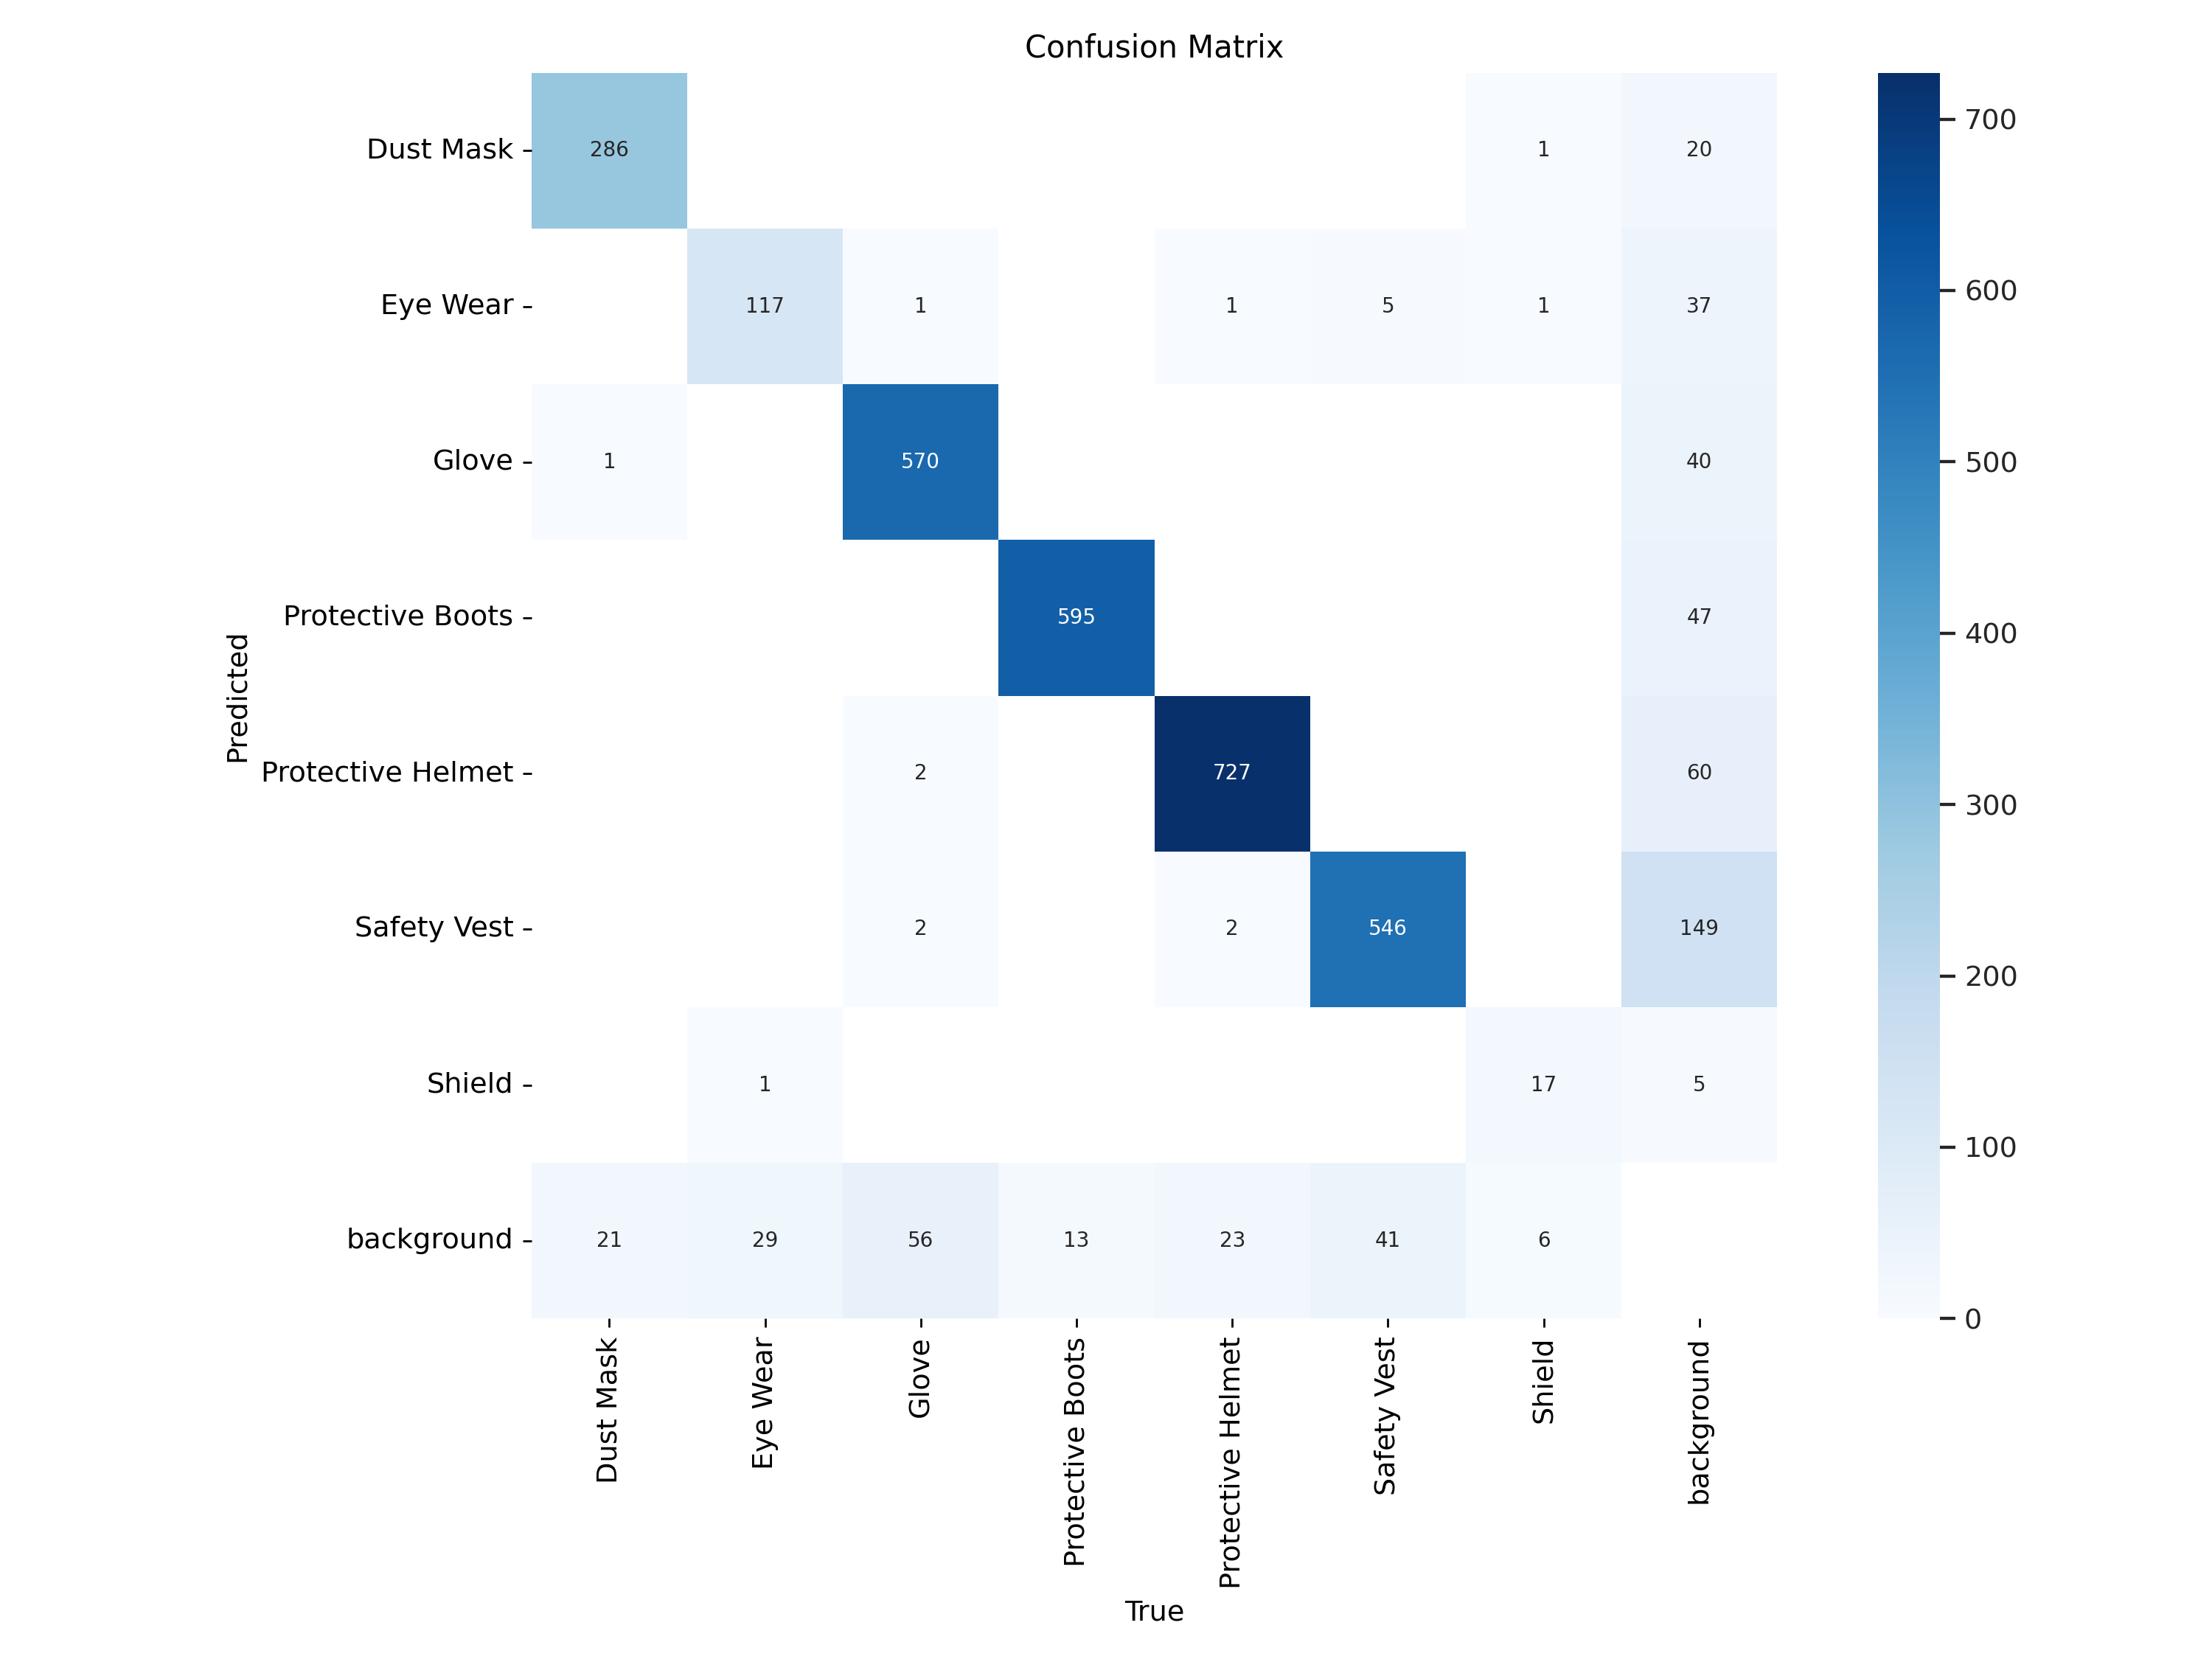

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

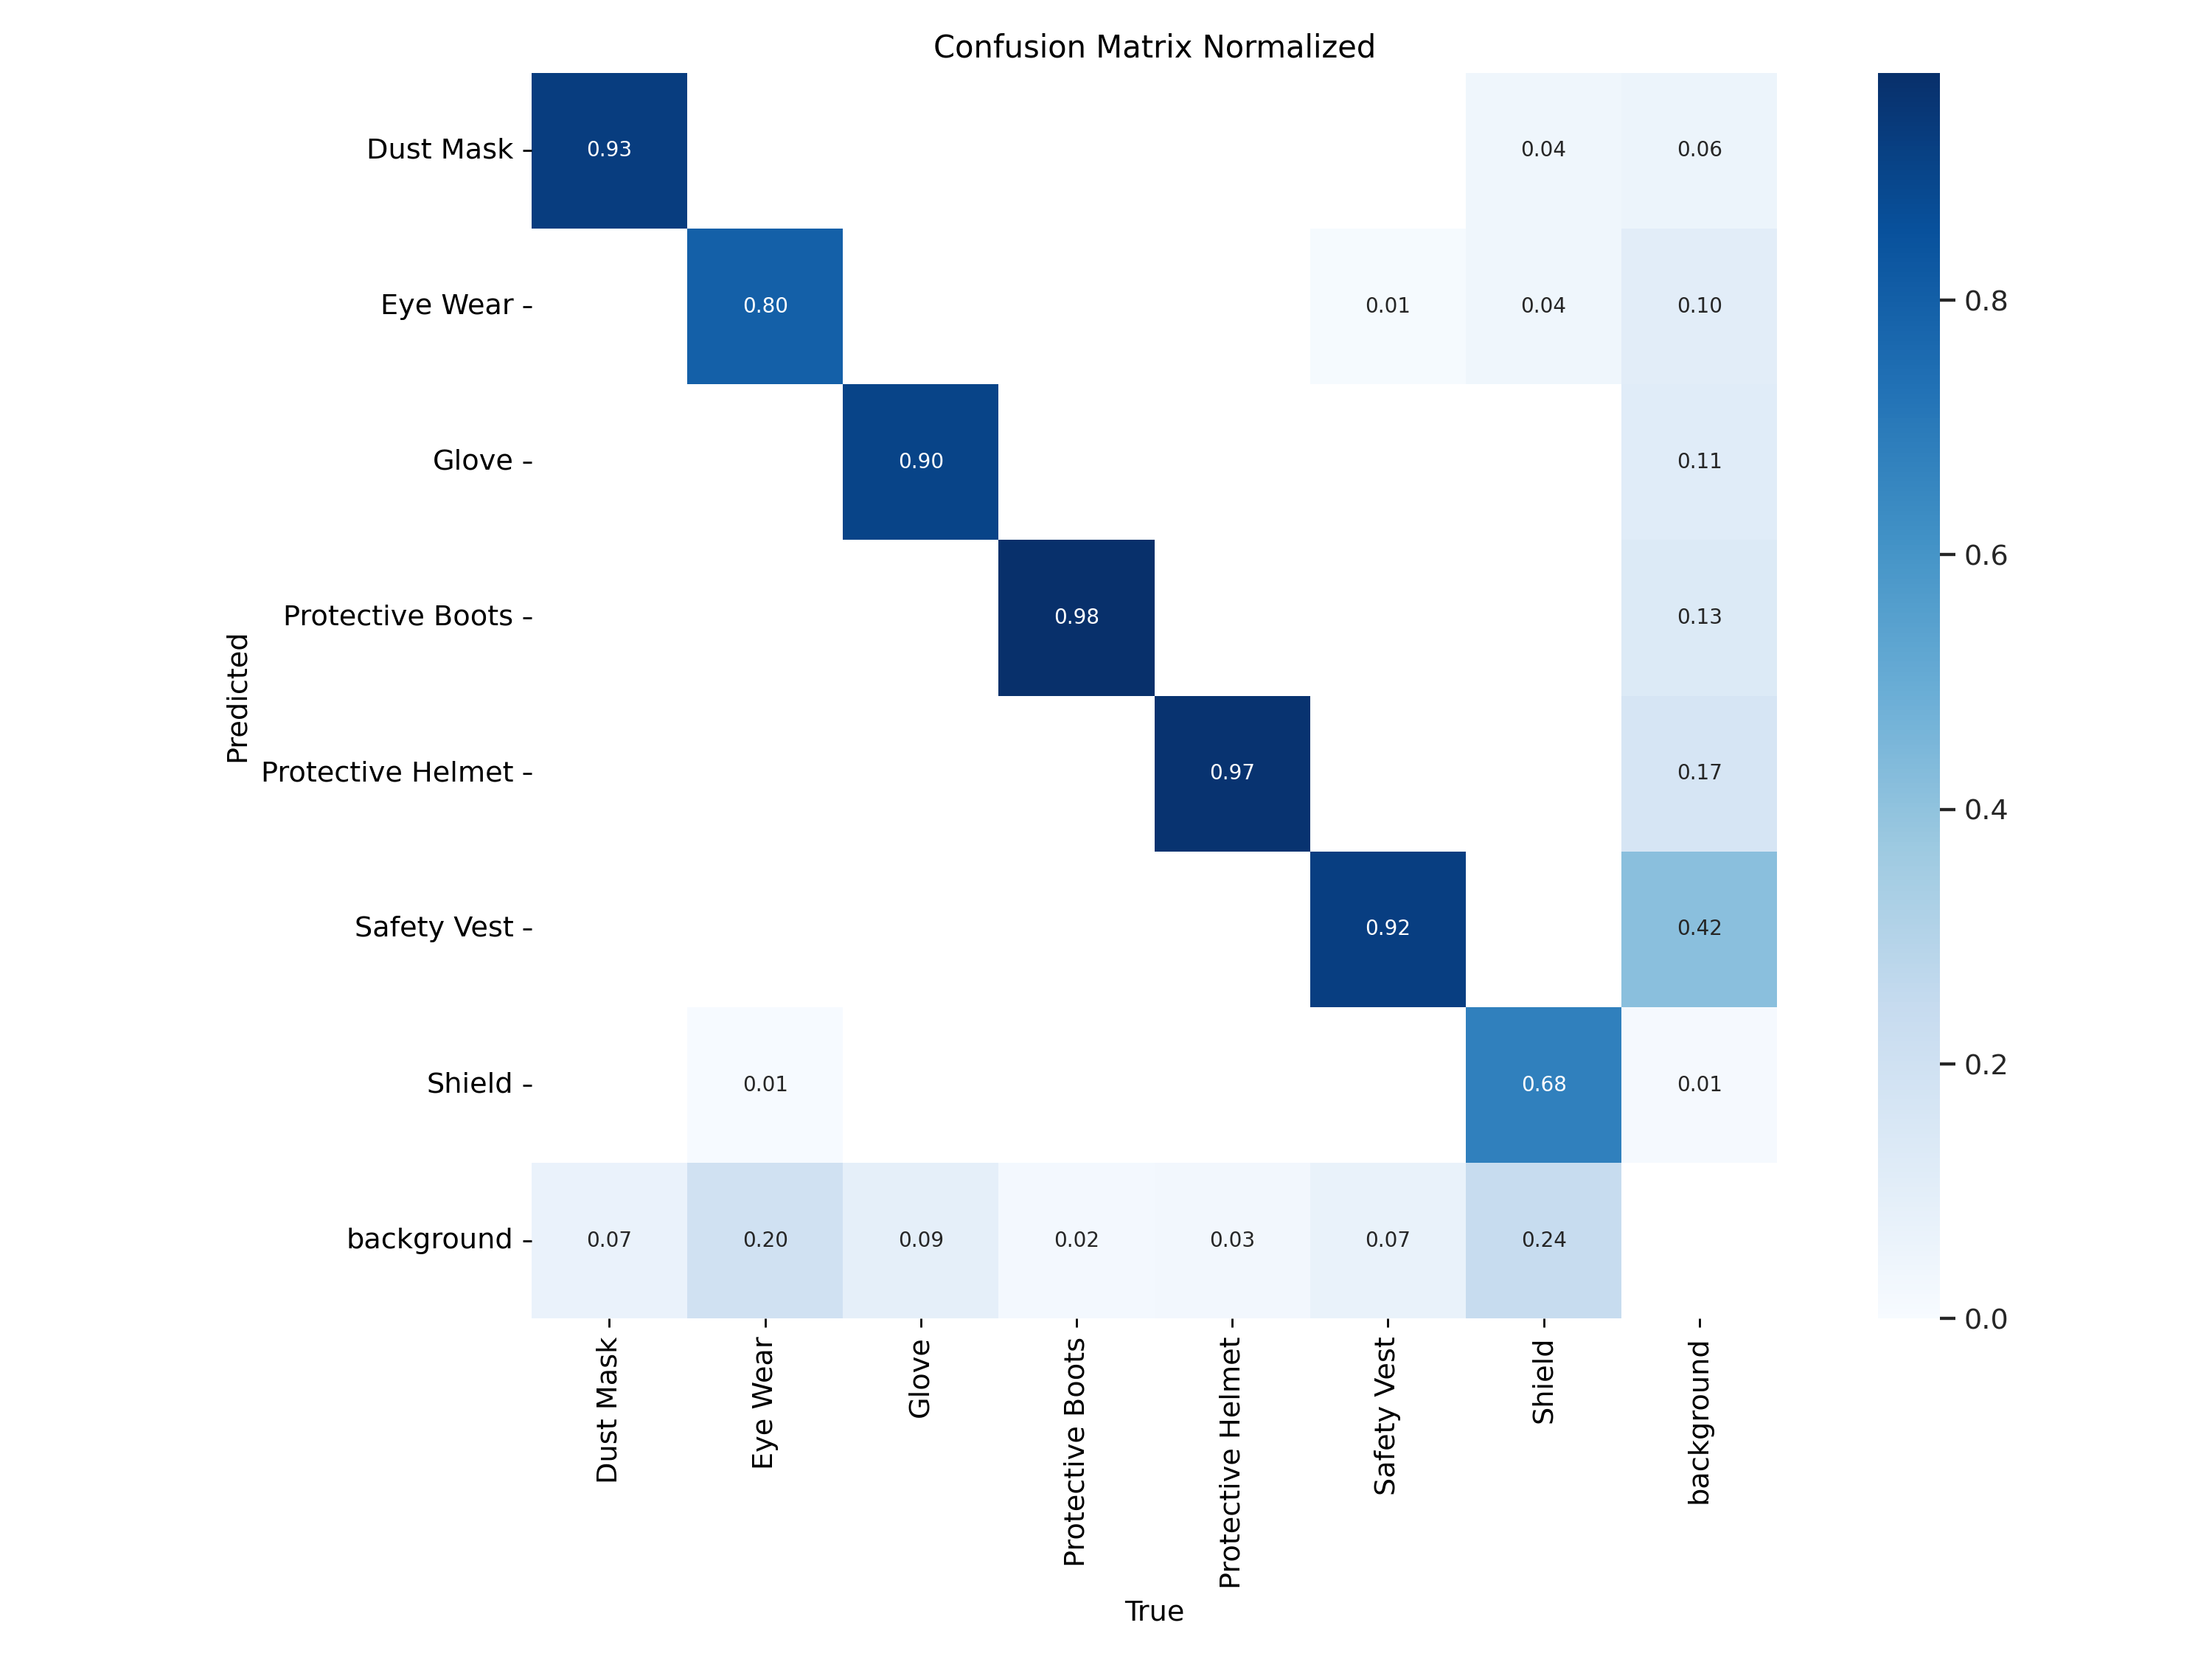

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix_normalized.png", width=600)

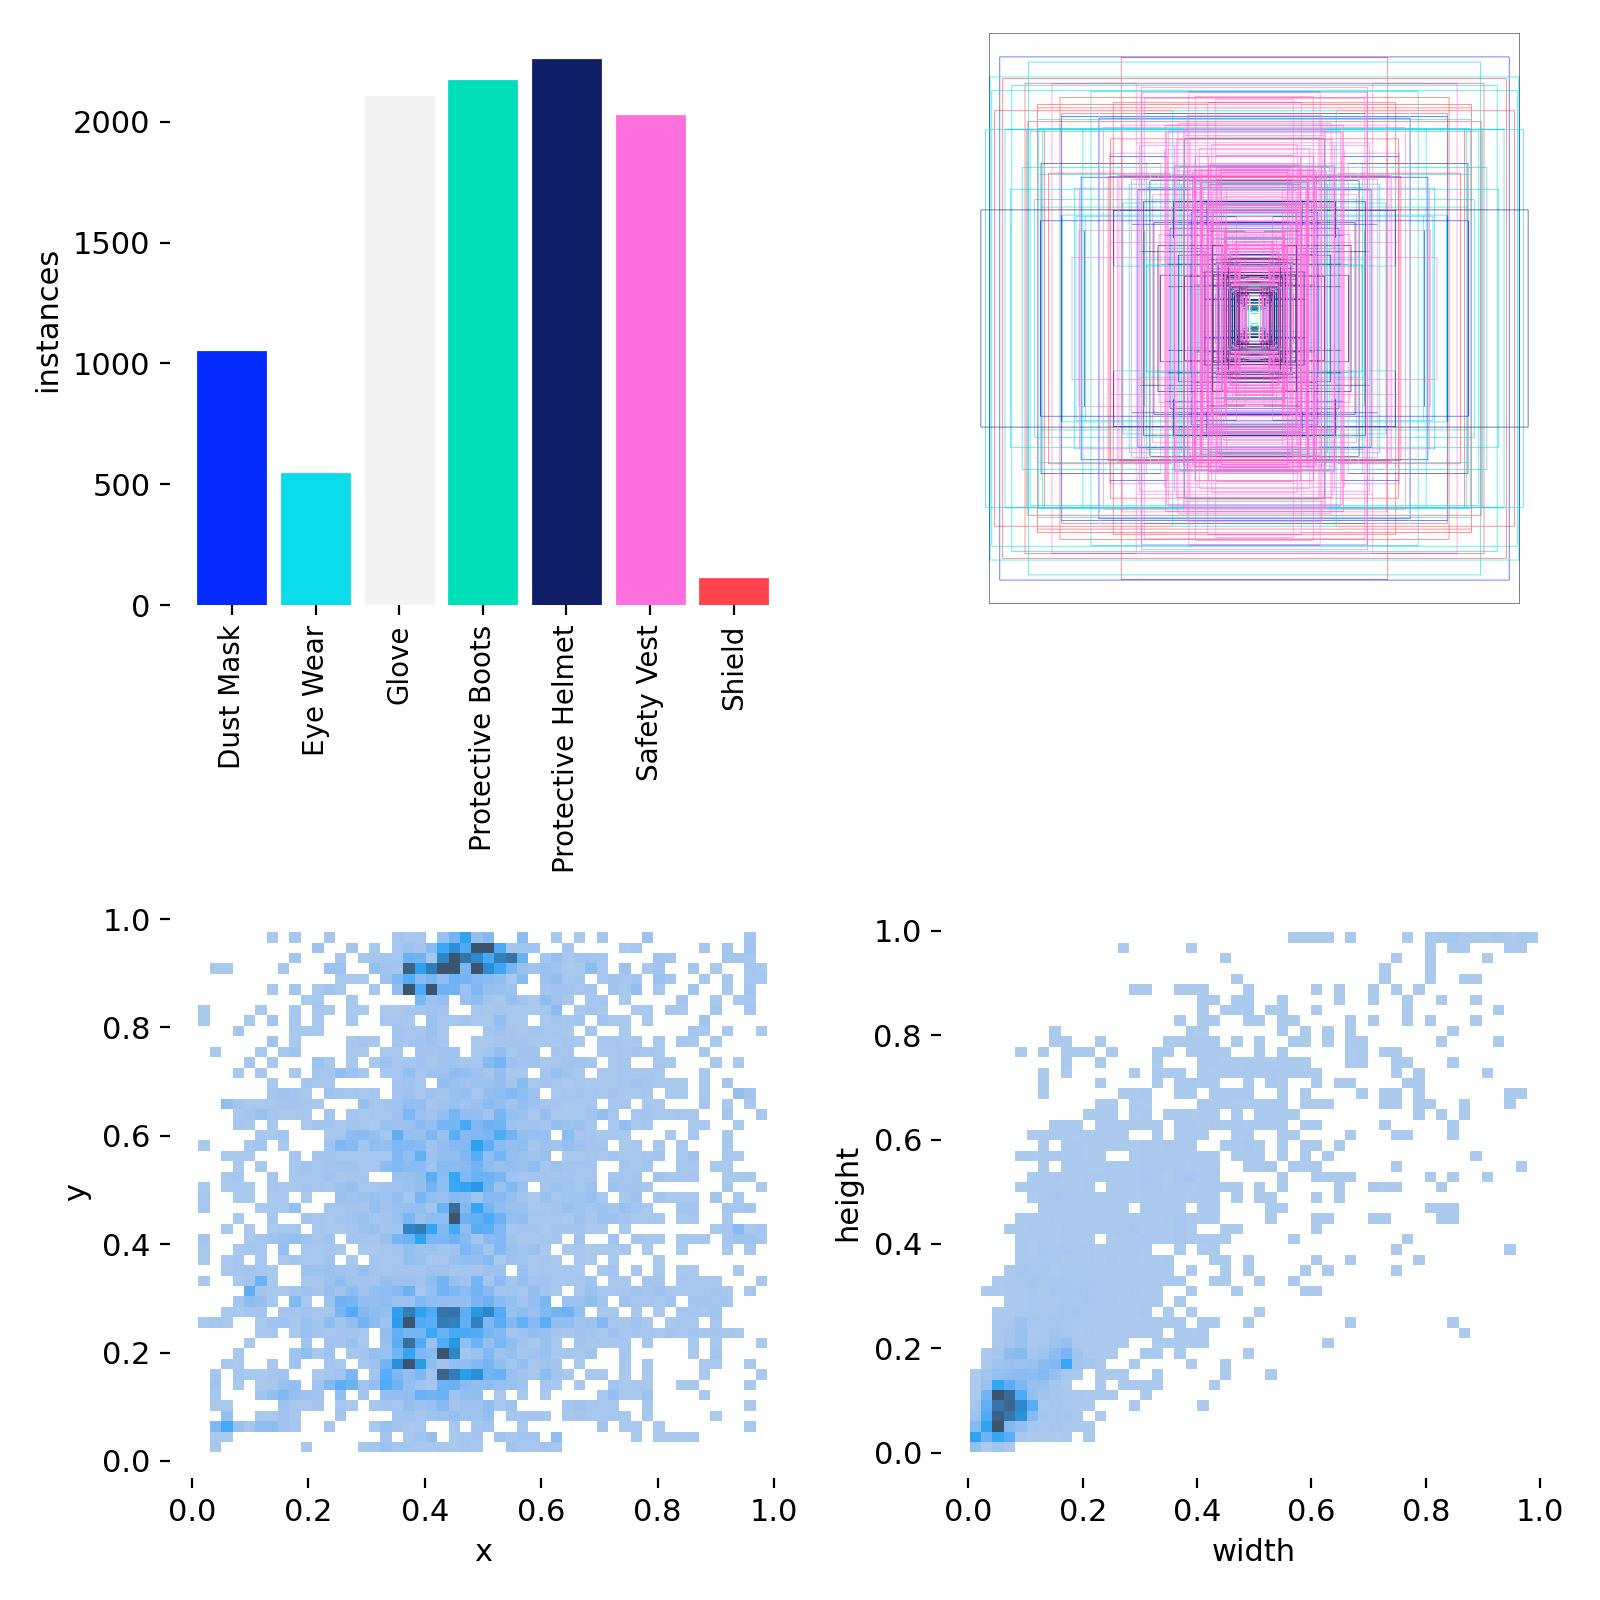

In [ ]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

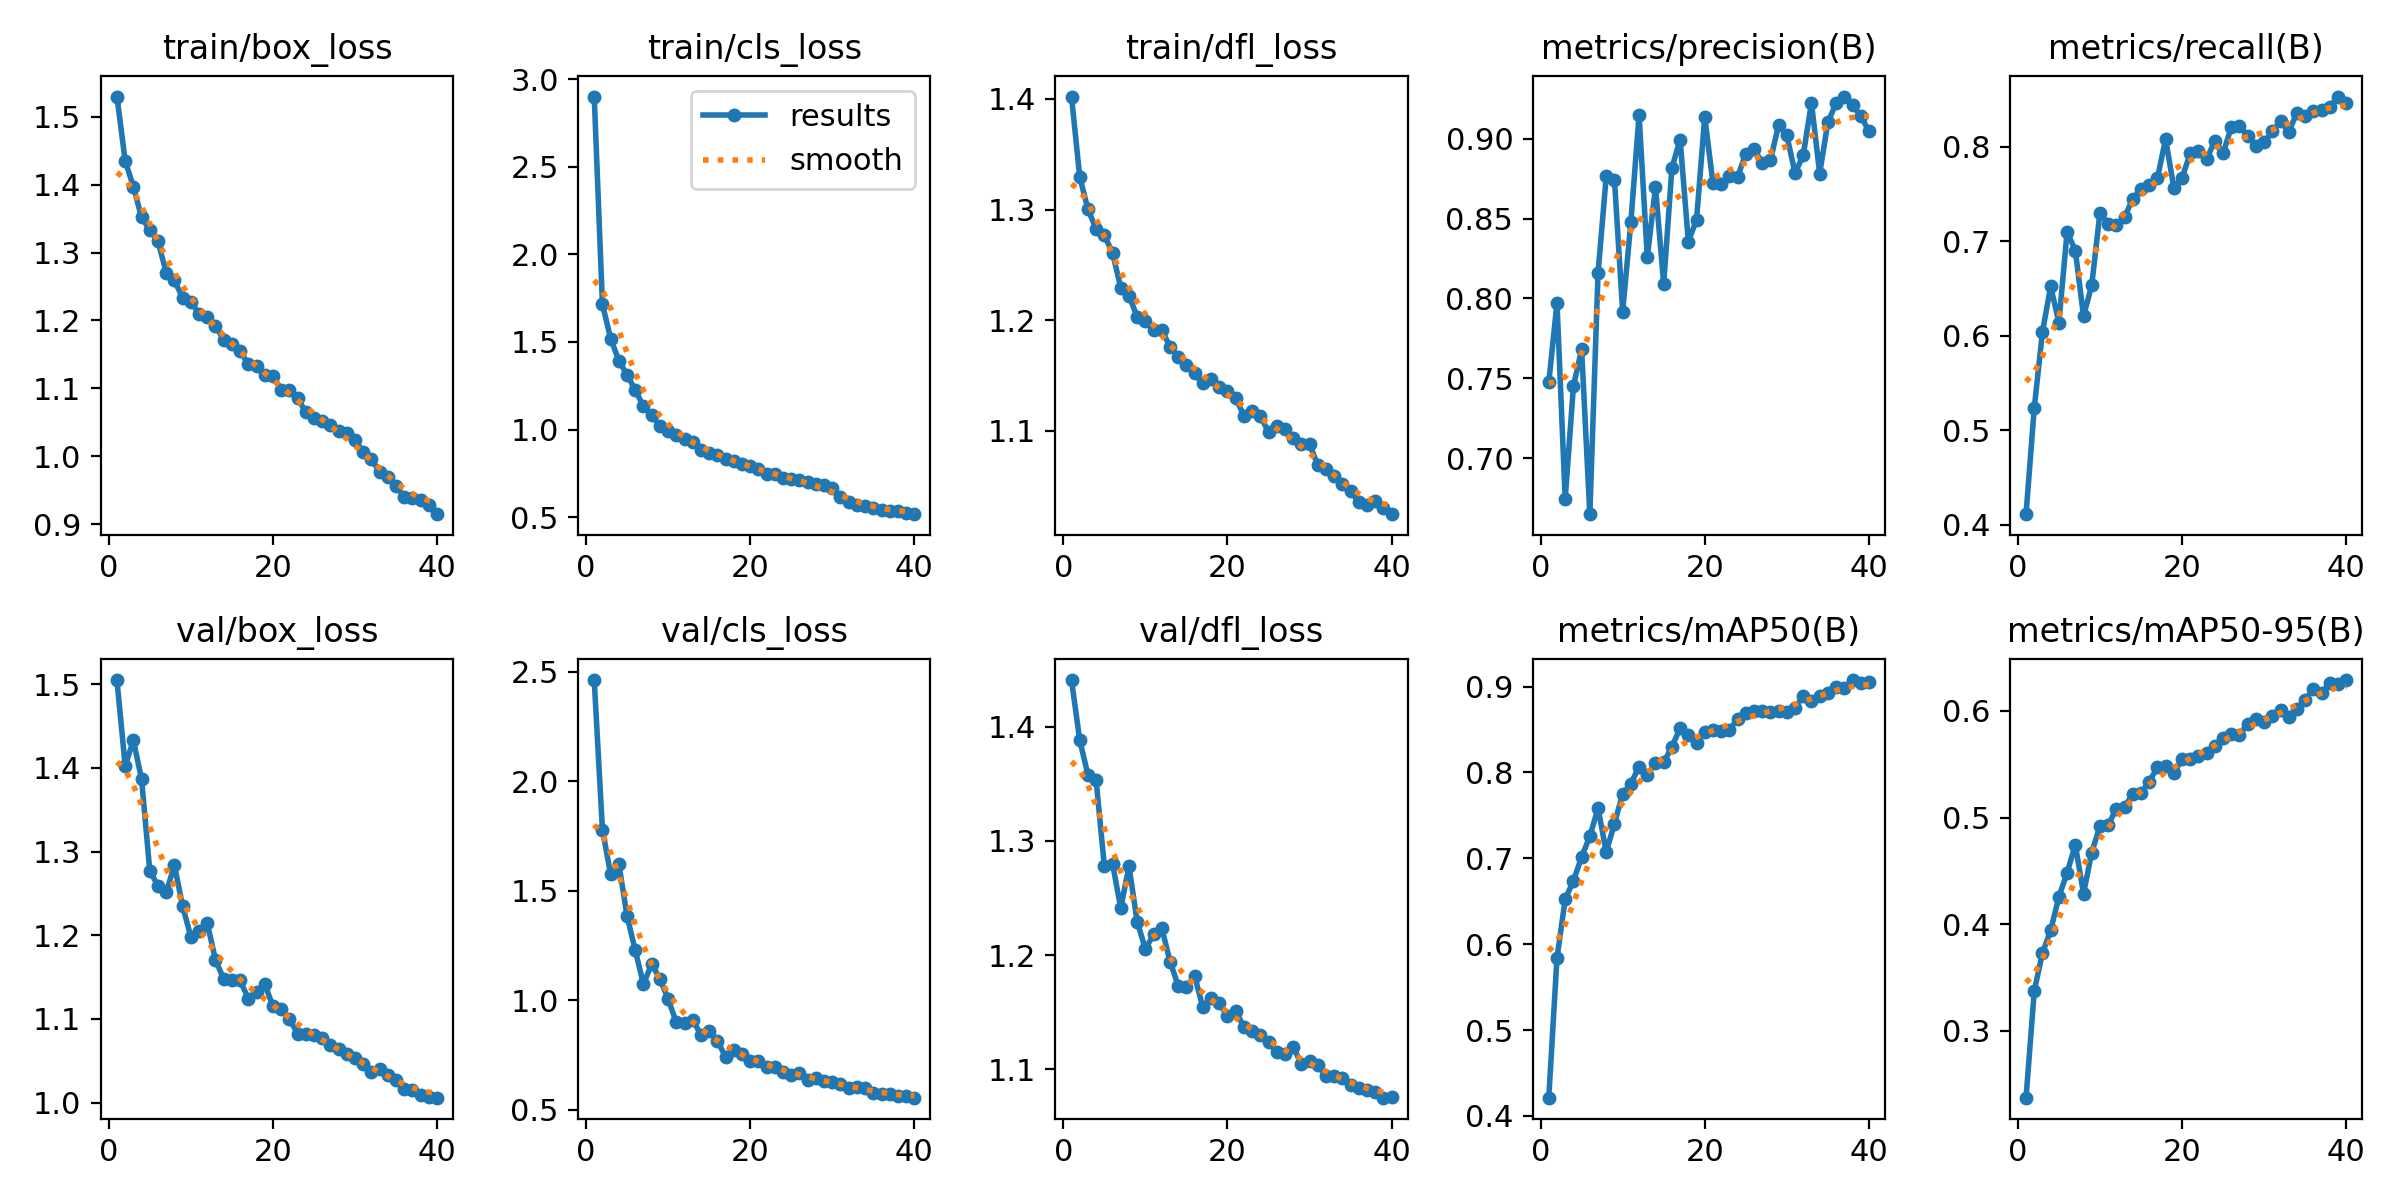

In [ ]:
Image("/content/runs/detect/train3/results.png", width=600)

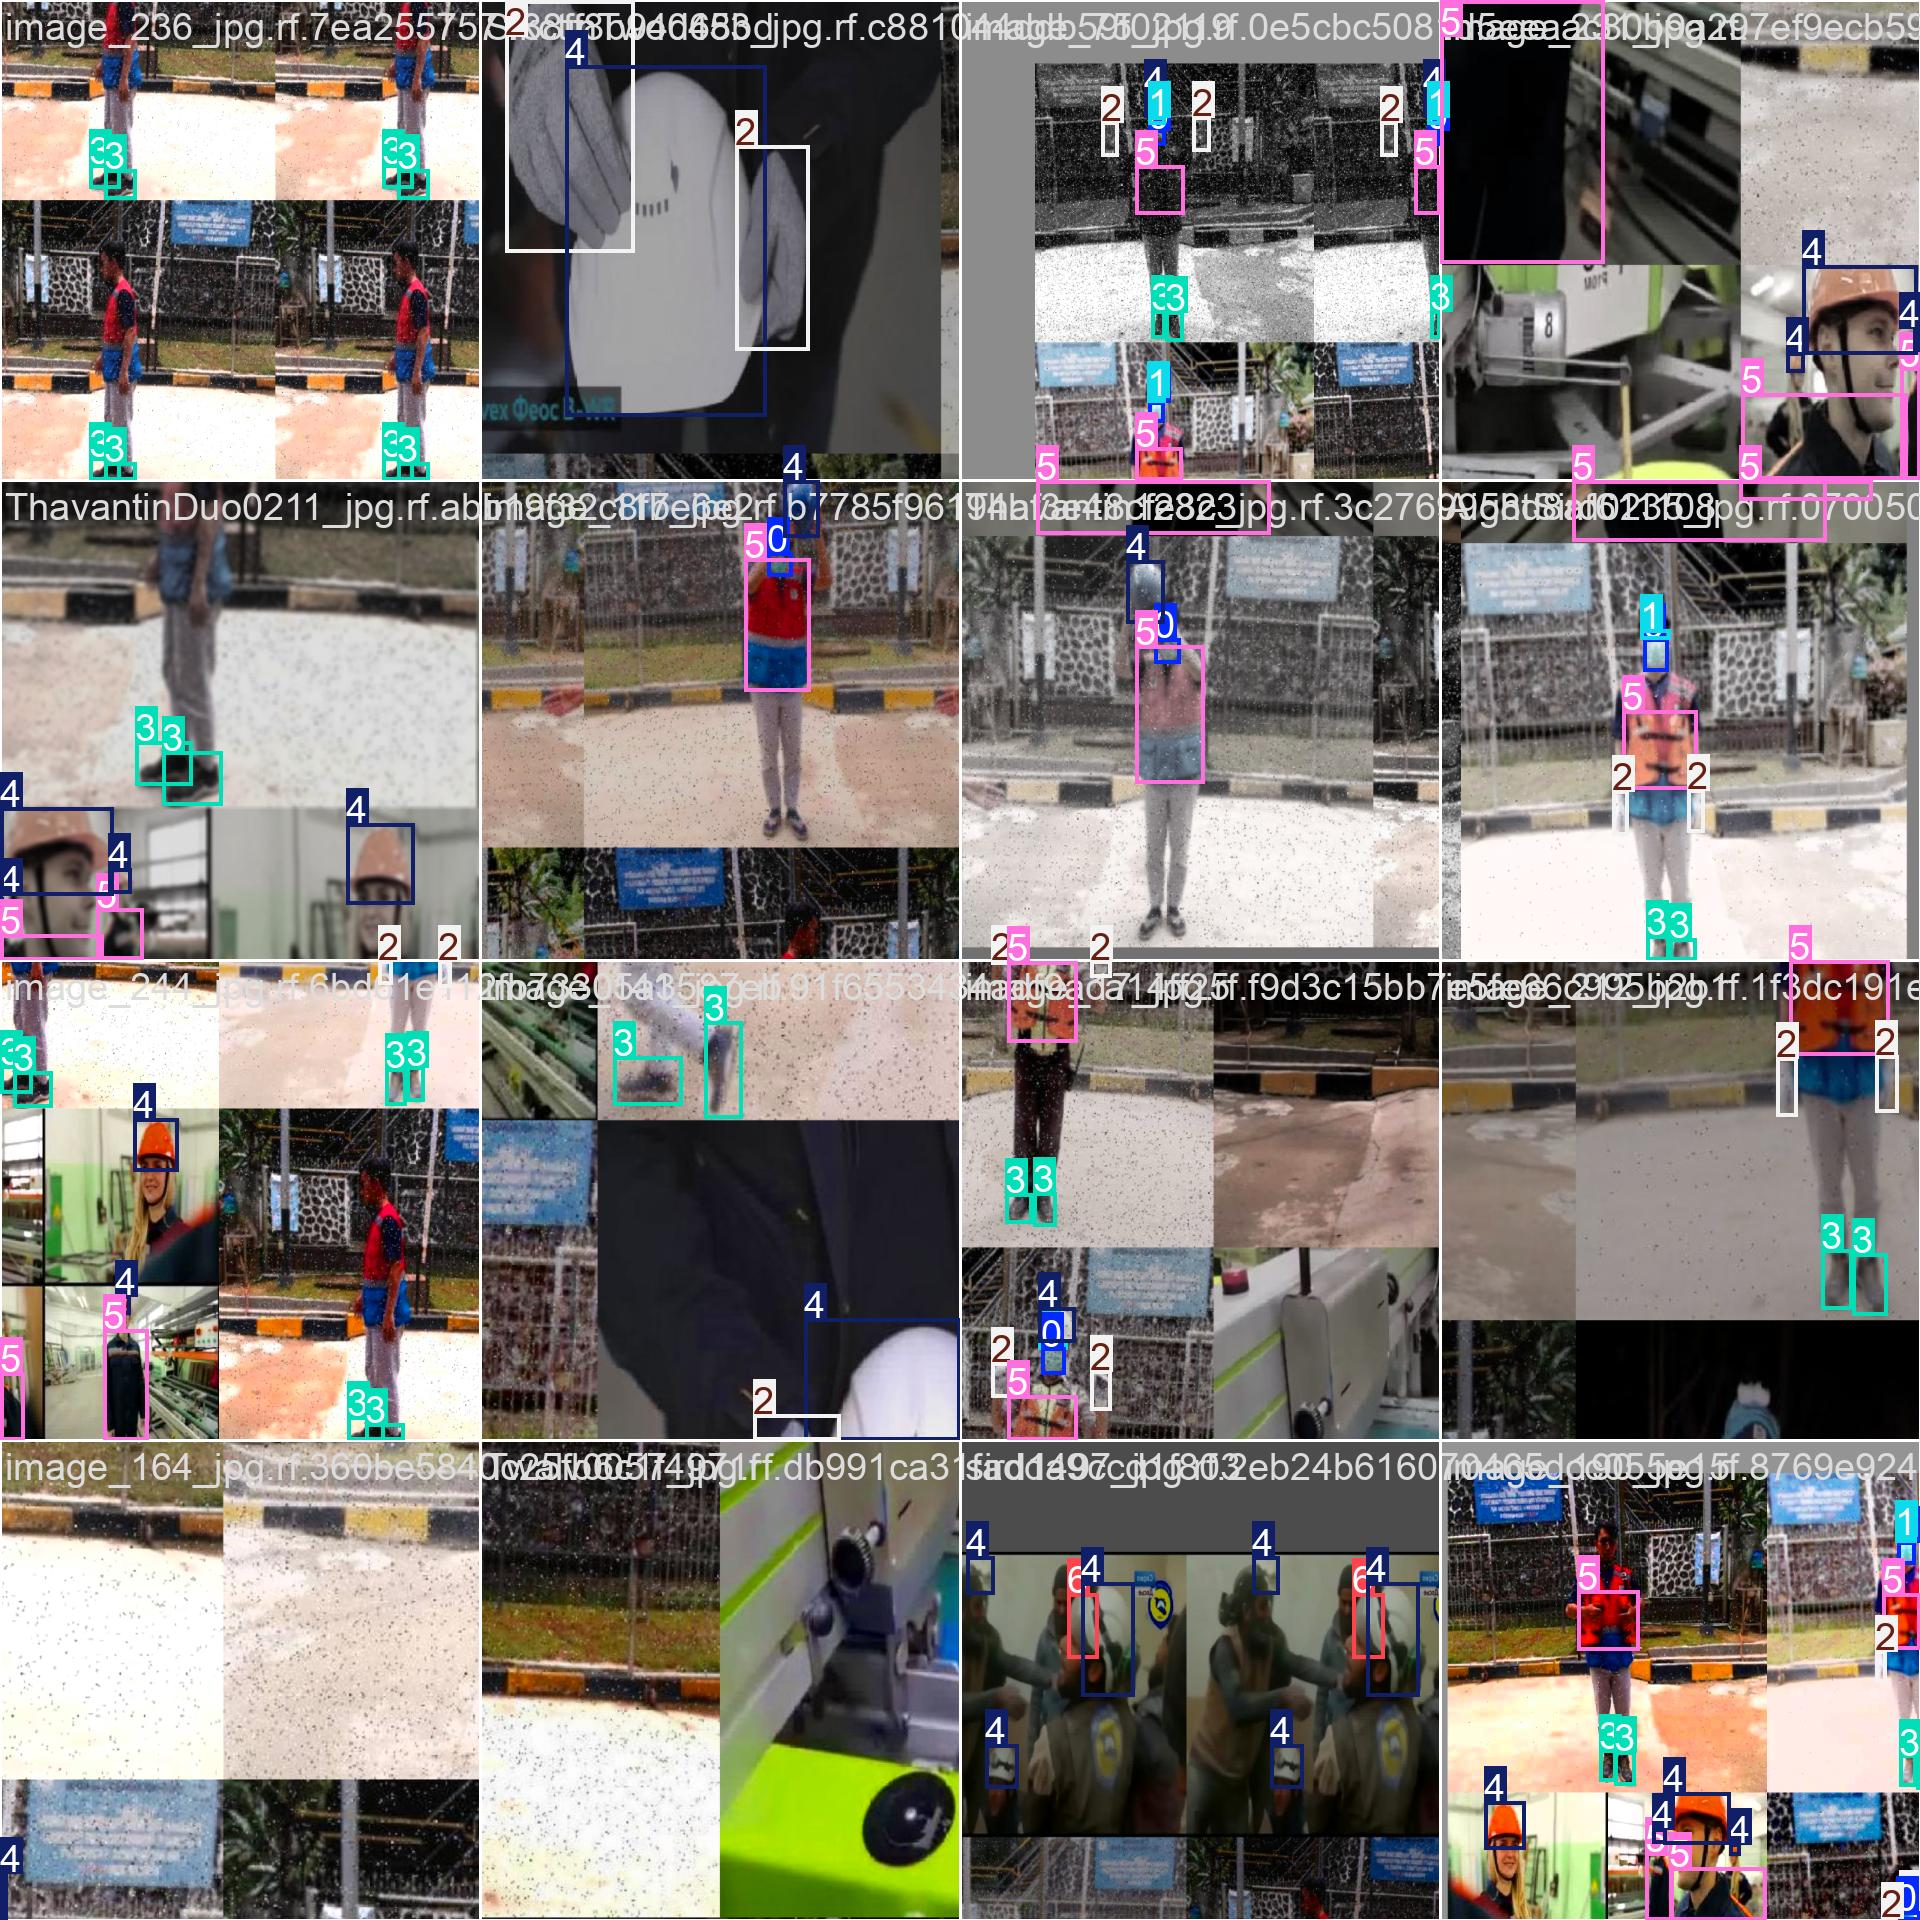

In [ ]:
Image("/content/runs/detect/train3/train_batch0.jpg", width=600)

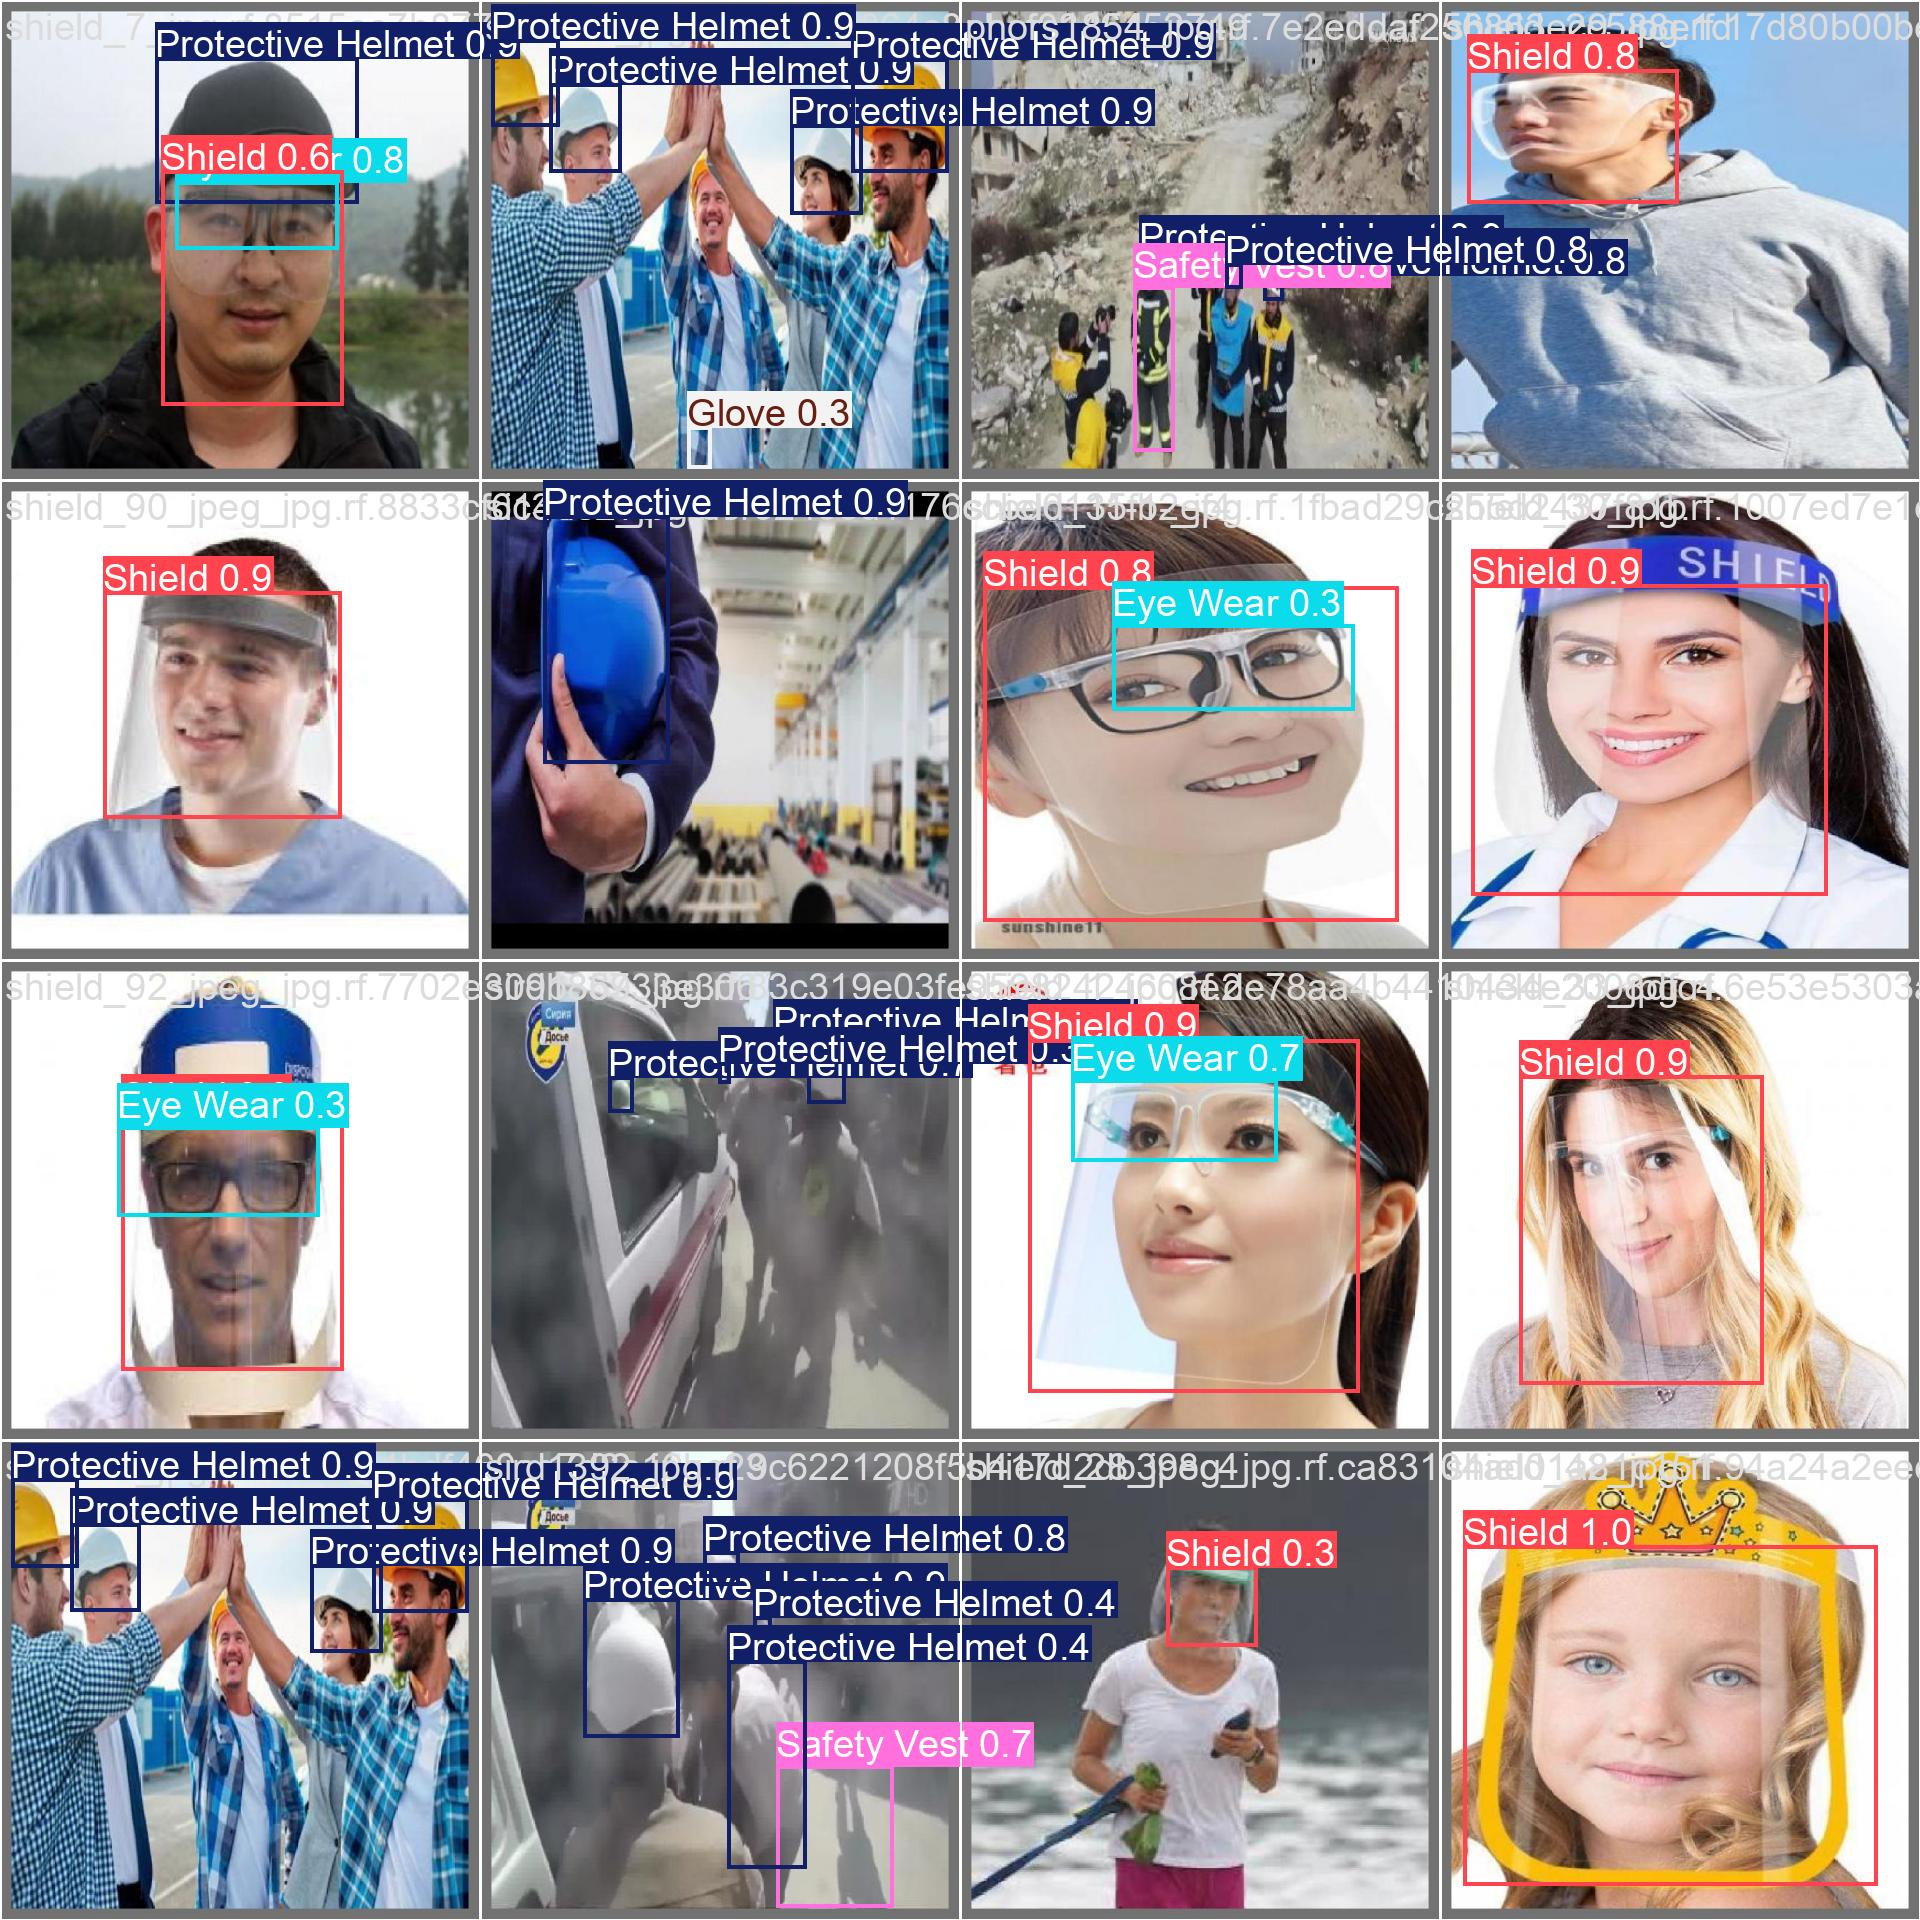

In [ ]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=600)

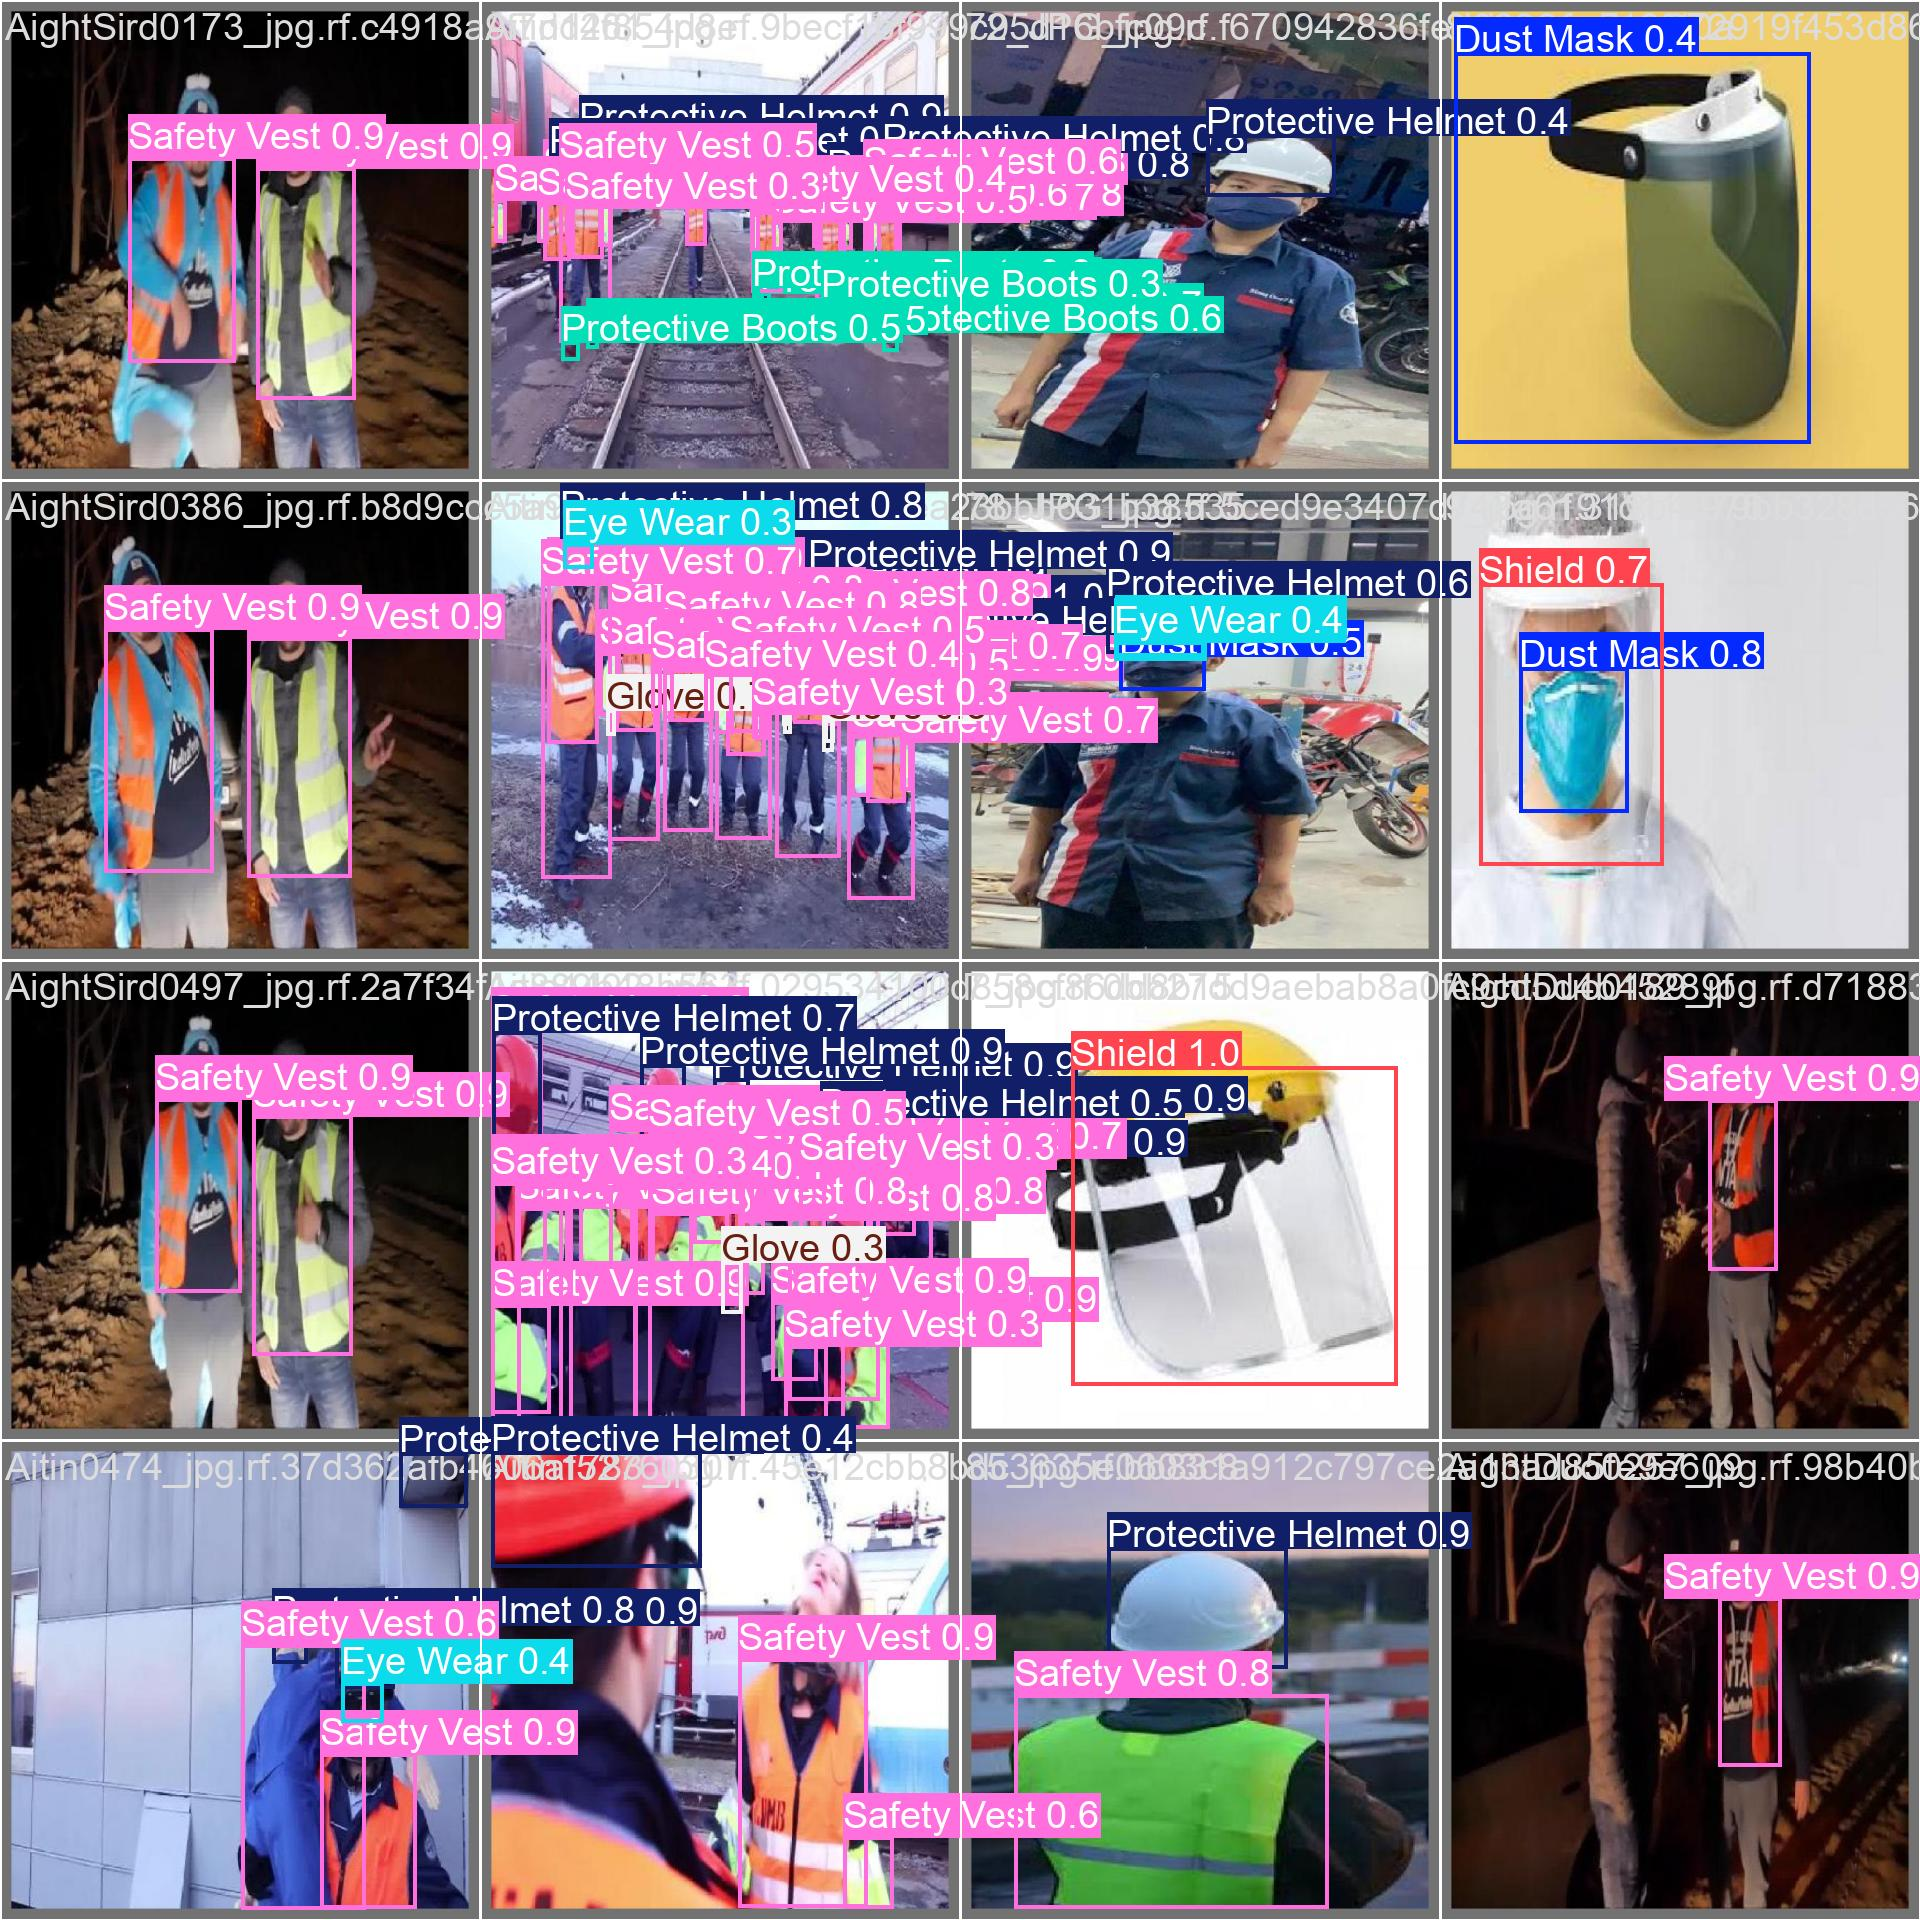

In [ ]:
Image("/content/runs/detect/train3/val_batch1_pred.jpg", width=600)

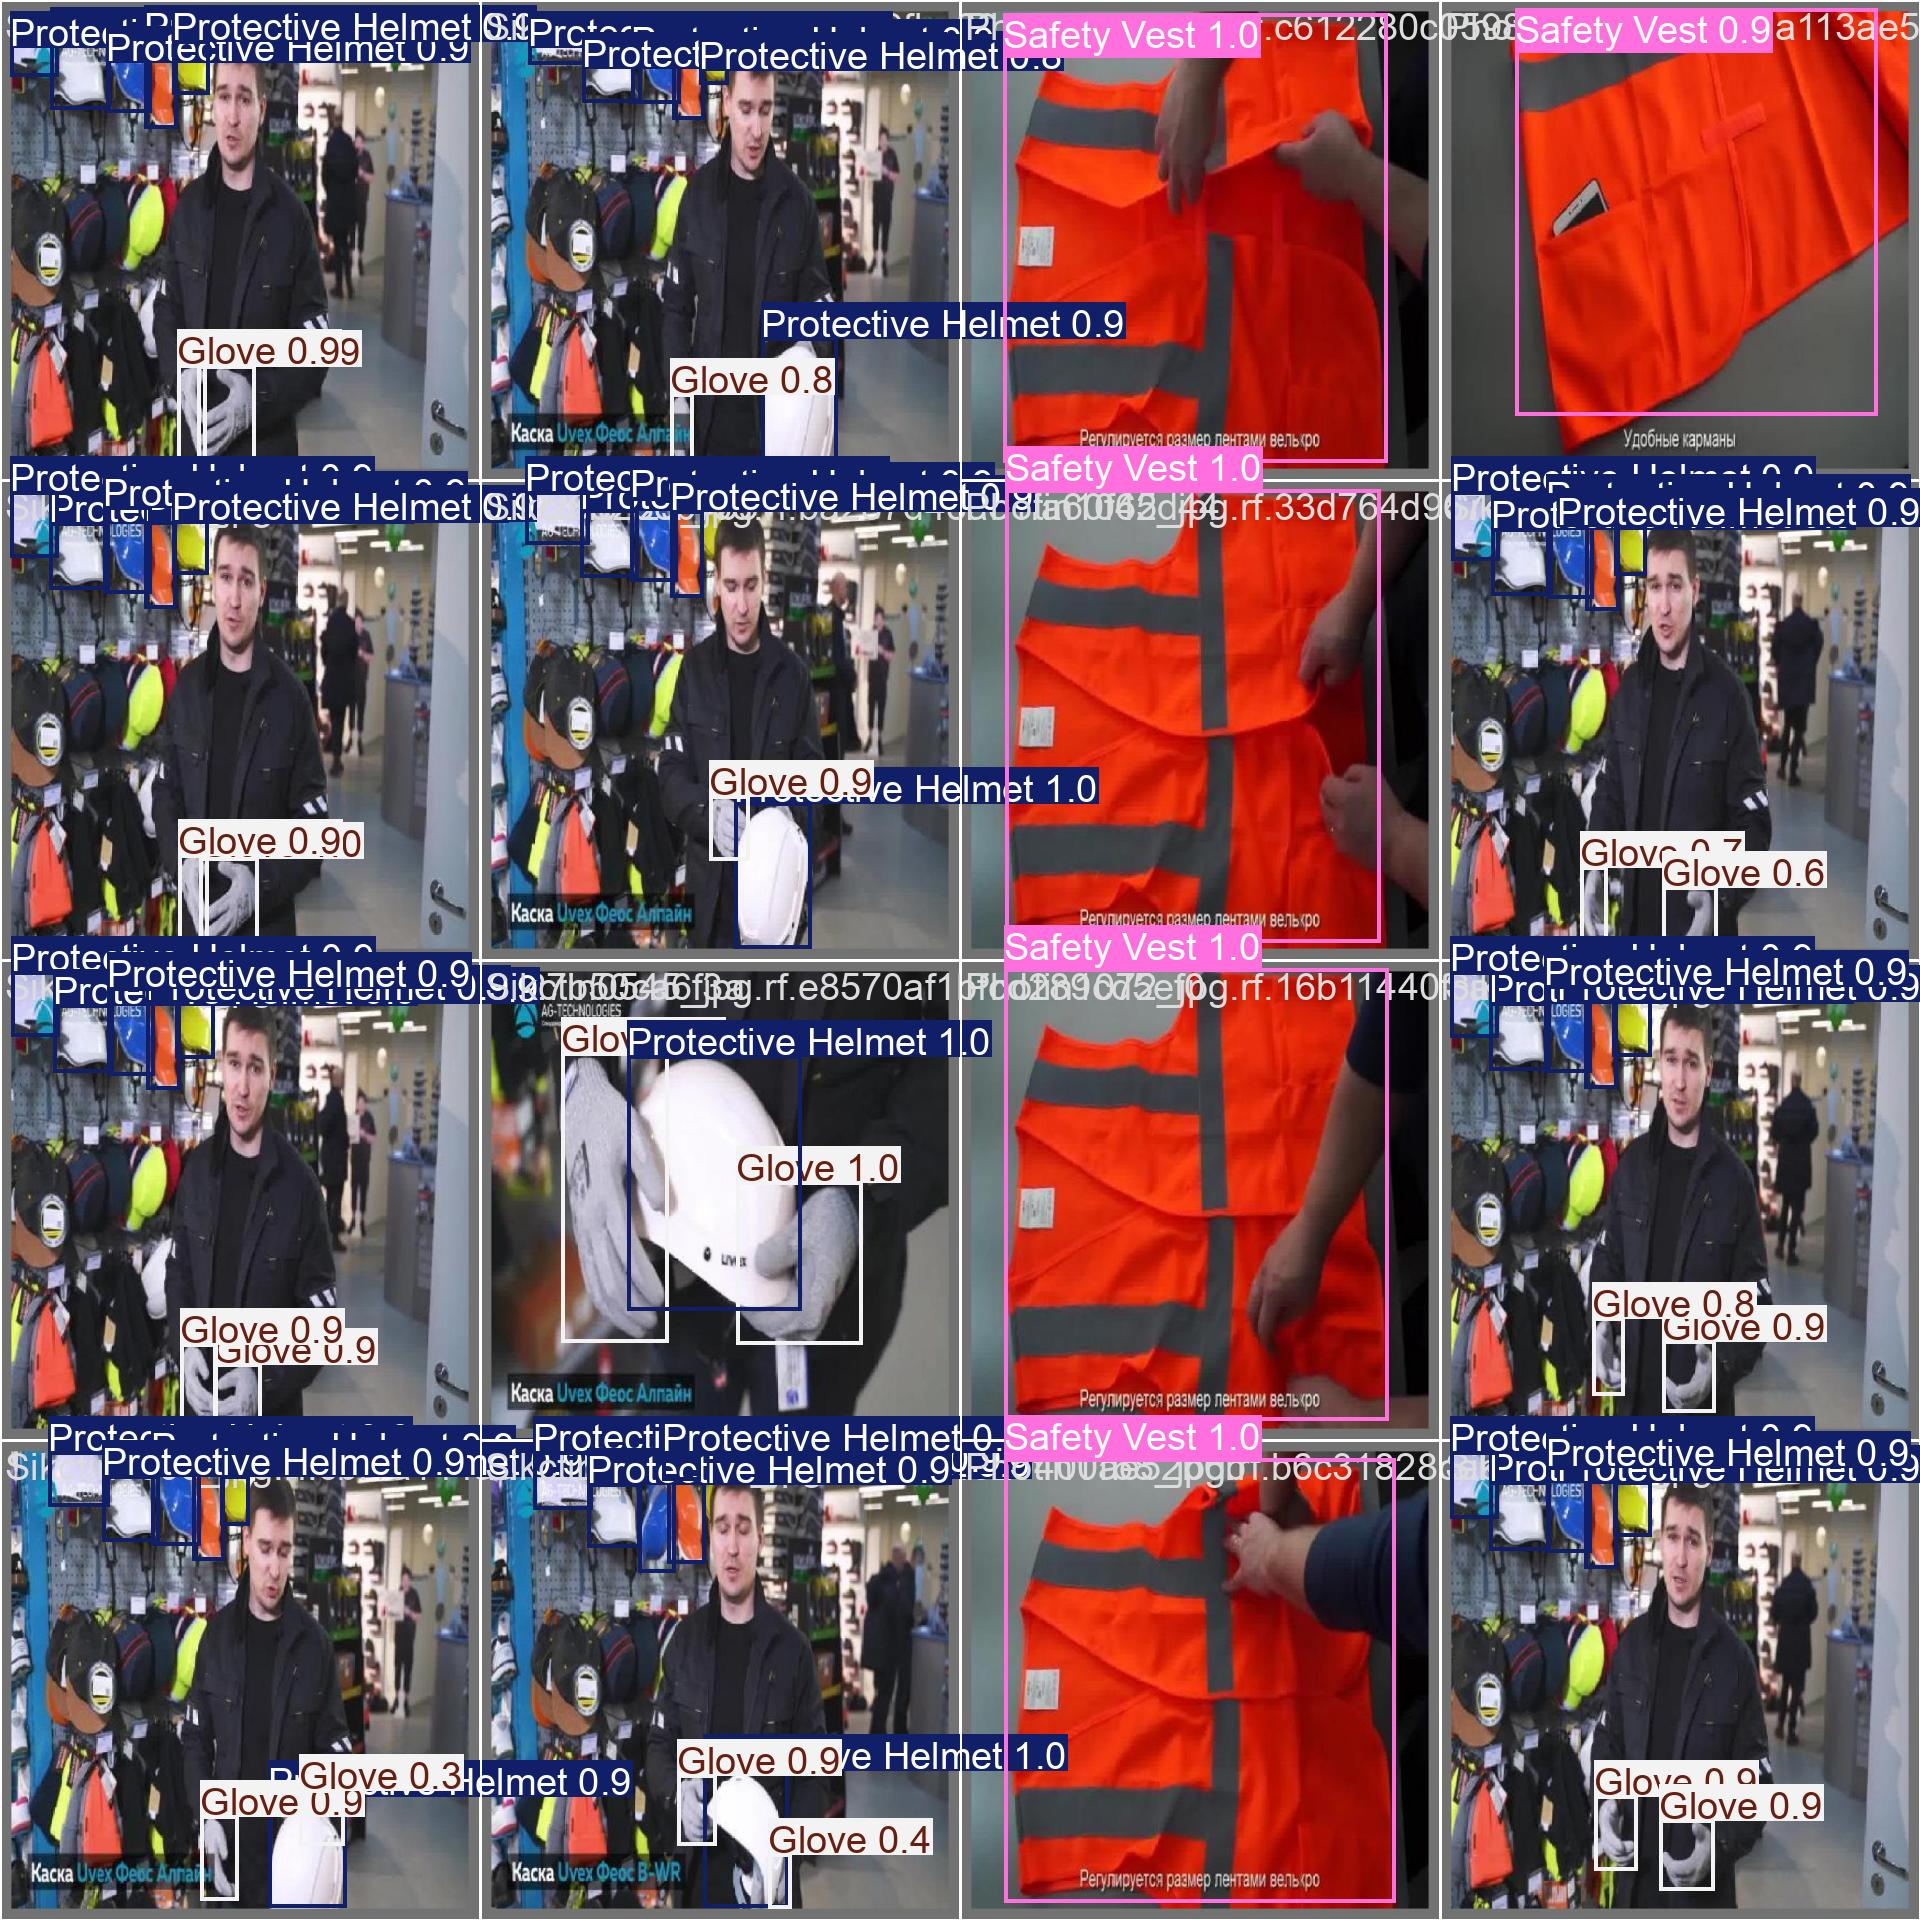

In [ ]:
Image("/content/runs/detect/train3/val_batch2_pred.jpg", width=600)

**Step # 06 Download the Model Weights from the Google Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iuIB_3vKBunhyxEPhuecWPAWgVY71BNF&confirm=t
To: /content/best.pt
100% 5.47M/5.47M [00:00<00:00, 150MB/s]


**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:09<00:00,  4.08it/s]
                   all        637       3064      0.905      0.847      0.905      0.629
             Dust Mask        299        308      0.982      0.899      0.958      0.671
              Eye Wear        146        147      0.865      0.728      0.778      0.443
                 Glove        346        631      0.966      0.883      0.943      0.671
      Protective Boots        298        608      0.968      0.961      0.982      0.694
     Protective Helmet        403        753      0.959      0.943      0.984      0.745
           Safety Vest        359        592   

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/322 /content/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Glove, 2 Protective Helmets, 11.9ms
image 2/322 /content/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 9.9ms
image 3/322 /content/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Dust Mask, 8.9ms
image 4/322 /content/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 1 Dust Mask, 1 Glove, 8.0ms
image 5/322 /content/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 1 Dust Mask, 1 Eye Wear, 7.8ms
image 6/322 /content/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg: 640x6

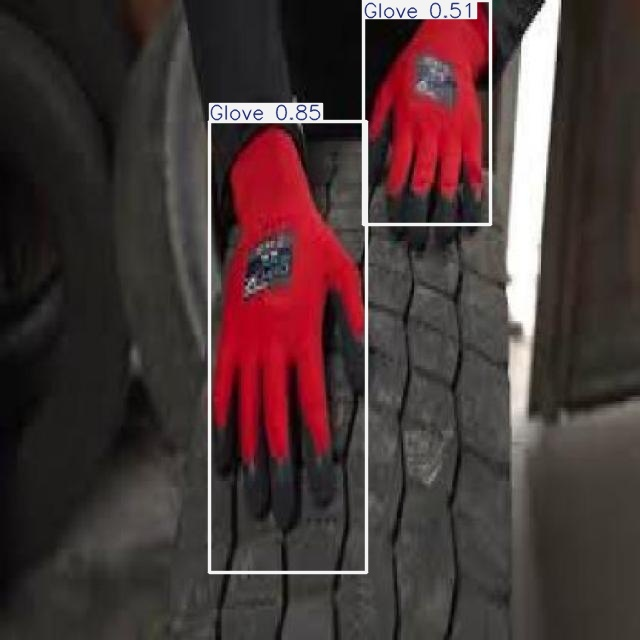

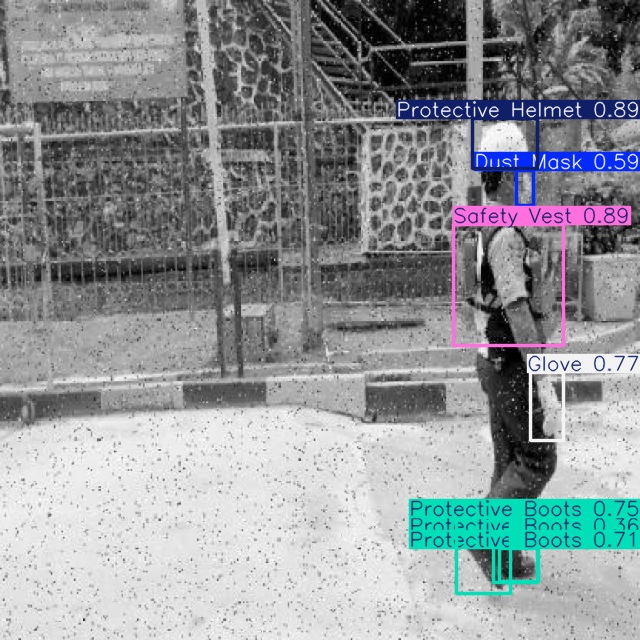

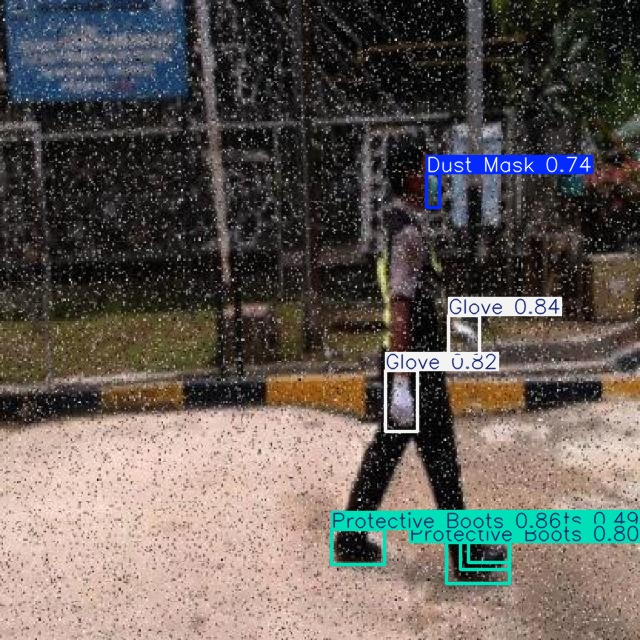

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 76.1MB/s]


In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 6 Protective Bootss, 3 Protective Helmets, 8 Safety Vests, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 717.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


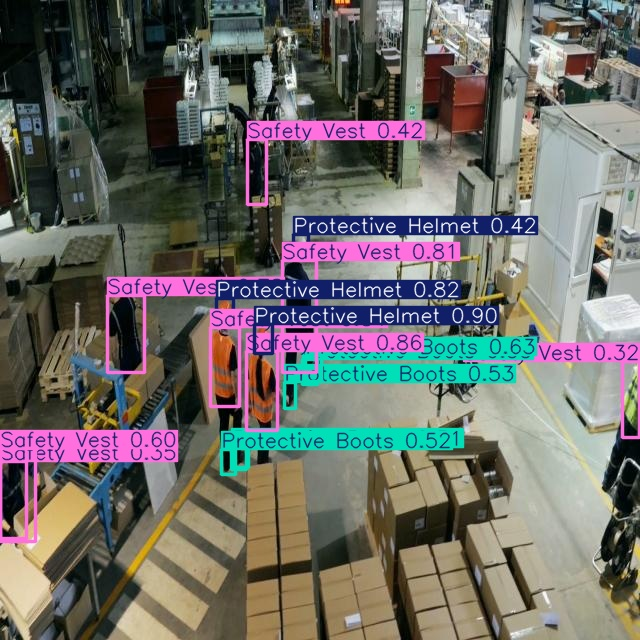

In [ ]:
Image("/content/runs/detect/predict2/image2.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 34.7MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 20.9MB/s]


In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 2 Protective Helmets, 3 Safety Vests, 61.8ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 2 Protective Helmets, 2 Safety Vests, 11.6ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 13.1ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 14.7ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 21.5ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 2 Safety Vests, 13.3ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 4 Protective Helmets, 3 Safety Vests, 11.8ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 3 Protective Helmets, 4 Safety Vests, 14.5ms
video 1/1 (frame 9/310) /co

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source="PPE_Part2.mp4" save=True

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/267) /content/PPE_Part2.mp4: 384x640 (no detections), 45.5ms
video 1/1 (frame 2/267) /content/PPE_Part2.mp4: 384x640 (no detections), 8.7ms
video 1/1 (frame 3/267) /content/PPE_Part2.mp4: 384x640 (no detections), 11.6ms
video 1/1 (frame 4/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.6ms
video 1/1 (frame 5/267) /content/PPE_Part2.mp4: 384x640 1 Protective Helmet, 1 Safety Vest, 13.3ms
video 1/1 (frame 6/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.2ms
video 1/1 (frame 7/267) /content/PPE_Part2.mp4: 384x640 (no detections), 11.7ms
video 1/1 (frame 8/267) /content/PPE_Part2.mp4: 384x640 (no detections), 8.6ms
video 1/1 (frame 9/267) /content/PPE_Part2.mp4: 384x640 (no detections), 11.8ms
video 1/1 (frame 10/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.0ms
video 1/1 (frame 

In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict4/PPE_Part2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)